# EXPLORATORY DATA ANALYSIS - BEIJING AIR QUALITY
## Exploratory Data Analysis (EDA) - Beijing Air Quality Dataset

---

### Table of Contents
1. **Introduction & Data Loading**
2. **Data Overview**
3. **Missing Values Handling**
4. **Descriptive Statistics**
5. **Comprehensive AQI Analysis (6 Pollutants)**
   - Calculate AQI from PM2.5, PM10, O3, NO2, SO2, CO
   - Determine Dominant Pollutant
   - Correlation Analysis with AQI
6. **Temporal AQI Analysis (Hour/Day/Season)**
7. **Weather Impact on AQI**
8. **Full Correlation Analysis**
9. **Comparison Between Monitoring Stations**
10. **Conclusion & Preparation for LSTM Forecasting**

---

### Dataset Information
- **Source**: 12 air quality monitoring stations in Beijing
- **Time Period**: 01/03/2013 - 28/02/2017 (4 years)
- **Frequency**: Hourly data
- **Pollutant Indicators**: PM2.5, PM10, SO2, NO2, CO, O3
- **Weather Factors**: Temperature, Pressure, Dew Point, Rainfall, Wind Direction, Wind Speed

### AQI Calculation Method
- **Composite AQI** = MAX(AQI_PM25, AQI_PM10, AQI_O3, AQI_NO2, AQI_SO2, AQI_CO)
- **Dominant Pollutant**: The pollutant with highest AQI
- Following **EPA (Environmental Protection Agency)** standards


In [1]:
# =============================================================================
# 1. IMPORT LIBRARIES AND CONFIGURATION
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import warnings
import os

# Display configuration
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', '{:.2f}'.format)

# Matplotlib configuration
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['legend.fontsize'] = 10

# Custom color palette
COLORS = {
    'primary': '#2E86AB',
    'secondary': '#A23B72',
    'success': '#28A745',
    'danger': '#DC3545',
    'warning': '#FFC107',
    'info': '#17A2B8',
    'dark': '#343A40',
    'light': '#F8F9FA'
}

# AQI level colors
AQI_COLORS = {
    'Good': '#00E400',
    'Moderate': '#FFFF00',
    'Unhealthy for Sensitive Groups': '#FF7E00',
    'Unhealthy': '#FF0000',
    'Very Unhealthy': '#8F3F97',
    'Hazardous': '#7E0023'
}

print("Successfully imported all libraries!")


Successfully imported all libraries!


## 2. LOAD AND MERGE DATA

Load all 12 CSV files from different monitoring stations and merge into a single DataFrame.


In [2]:
# =============================================================================
# 2. LOAD AND MERGE DATA
# =============================================================================

# Path to data folder
data_path = 'data_air/'

# Load all CSV files
all_files = glob(data_path + '*.csv')
print(f"Found {len(all_files)} data files:")
for f in all_files:
    print(f"   - {os.path.basename(f)}")

# Merge all files into one DataFrame
df_list = []
for file in all_files:
    df_temp = pd.read_csv(file)
    df_list.append(df_temp)
    
df = pd.concat(df_list, ignore_index=True)

print(f"\nSuccessfully loaded and merged!")
print(f"Total rows: {len(df):,}")
print(f"Total columns: {df.shape[1]}")


Found 12 data files:
   - PRSA_Data_Aotizhongxin_20130301-20170228.csv
   - PRSA_Data_Changping_20130301-20170228.csv
   - PRSA_Data_Dingling_20130301-20170228.csv
   - PRSA_Data_Dongsi_20130301-20170228.csv
   - PRSA_Data_Guanyuan_20130301-20170228.csv
   - PRSA_Data_Gucheng_20130301-20170228.csv
   - PRSA_Data_Huairou_20130301-20170228.csv
   - PRSA_Data_Nongzhanguan_20130301-20170228.csv
   - PRSA_Data_Shunyi_20130301-20170228.csv
   - PRSA_Data_Tiantan_20130301-20170228.csv
   - PRSA_Data_Wanliu_20130301-20170228.csv
   - PRSA_Data_Wanshouxigong_20130301-20170228.csv

Successfully loaded and merged!
Total rows: 420,768
Total columns: 18


## 3. DATA OVERVIEW

### 3.1 Sample Data and Basic Information


In [3]:
# View first 5 rows
print("First 5 rows of data:")
df.head()


First 5 rows of data:


No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0   4.00  4.00  4.00  7.00 300.00 77.00 -0.70   
1   2  2013      3    1     1   8.00  8.00  4.00  7.00 300.00 77.00 -1.10   
2   3  2013      3    1     2   7.00  7.00  5.00 10.00 300.00 73.00 -1.10   
3   4  2013      3    1     3   6.00  6.00 11.00 11.00 300.00 72.00 -1.40   
4   5  2013      3    1     4   3.00  3.00 12.00 12.00 300.00 72.00 -2.00   

     PRES   DEWP  RAIN   wd  WSPM       station  
0 1023.00 -18.80  0.00  NNW  4.40  Aotizhongxin  
1 1023.20 -18.20  0.00    N  4.70  Aotizhongxin  
2 1023.50 -18.20  0.00  NNW  5.60  Aotizhongxin  
3 1024.50 -19.40  0.00   NW  3.10  Aotizhongxin  
4 1025.20 -19.50  0.00    N  2.00  Aotizhongxin

In [4]:
# Column information
print("Data columns information:")
print("="*60)
df.info()


Data columns information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


In [5]:
# Column descriptions
column_descriptions = {
    'No': 'Record number',
    'year': 'Year',
    'month': 'Month',
    'day': 'Day',
    'hour': 'Hour (0-23)',
    'PM2.5': 'PM2.5 concentration (μg/m³) - Fine particles diameter < 2.5 micrometers',
    'PM10': 'PM10 concentration (μg/m³) - Particles diameter < 10 micrometers',
    'SO2': 'Sulfur Dioxide concentration (μg/m³)',
    'NO2': 'Nitrogen Dioxide concentration (μg/m³)',
    'CO': 'Carbon Monoxide concentration (μg/m³)',
    'O3': 'Ozone concentration (μg/m³)',
    'TEMP': 'Temperature (°C)',
    'PRES': 'Atmospheric Pressure (hPa)',
    'DEWP': 'Dew Point (°C)',
    'RAIN': 'Rainfall (mm)',
    'wd': 'Wind Direction',
    'WSPM': 'Wind Speed (m/s)',
    'station': 'Monitoring Station Name'
}

print("COLUMN DESCRIPTIONS:")
print("="*80)
for col, desc in column_descriptions.items():
    print(f"  • {col:10} : {desc}")


COLUMN DESCRIPTIONS:
  • No         : Record number
  • year       : Year
  • month      : Month
  • day        : Day
  • hour       : Hour (0-23)
  • PM2.5      : PM2.5 concentration (μg/m³) - Fine particles diameter < 2.5 micrometers
  • PM10       : PM10 concentration (μg/m³) - Particles diameter < 10 micrometers
  • SO2        : Sulfur Dioxide concentration (μg/m³)
  • NO2        : Nitrogen Dioxide concentration (μg/m³)
  • CO         : Carbon Monoxide concentration (μg/m³)
  • O3         : Ozone concentration (μg/m³)
  • TEMP       : Temperature (°C)
  • PRES       : Atmospheric Pressure (hPa)
  • DEWP       : Dew Point (°C)
  • RAIN       : Rainfall (mm)
  • wd         : Wind Direction
  • WSPM       : Wind Speed (m/s)
  • station    : Monitoring Station Name


In [6]:
# List of monitoring stations
print("LIST OF MONITORING STATIONS:")
print("="*60)
stations = df['station'].unique()
for i, station in enumerate(stations, 1):
    count = len(df[df['station'] == station])
    print(f"  {i:2}. {station:20} - {count:,} records")


LIST OF MONITORING STATIONS:
   1. Aotizhongxin         - 35,064 records
   2. Changping            - 35,064 records
   3. Dingling             - 35,064 records
   4. Dongsi               - 35,064 records
   5. Guanyuan             - 35,064 records
   6. Gucheng              - 35,064 records
   7. Huairou              - 35,064 records
   8. Nongzhanguan         - 35,064 records
   9. Shunyi               - 35,064 records
  10. Tiantan              - 35,064 records
  11. Wanliu               - 35,064 records
  12. Wanshouxigong        - 35,064 records


### 3.2 Missing Values Analysis


MISSING VALUES ANALYSIS:
       Missing Count  Percentage (%)
CO             20701            4.92
O3             13277            3.16
NO2            12116            2.88
SO2             9021            2.14
PM2.5           8739            2.08
PM10            6449            1.53
wd              1822            0.43
DEWP             403            0.10
PRES             393            0.09
RAIN             390            0.09
TEMP             398            0.09
WSPM             318            0.08


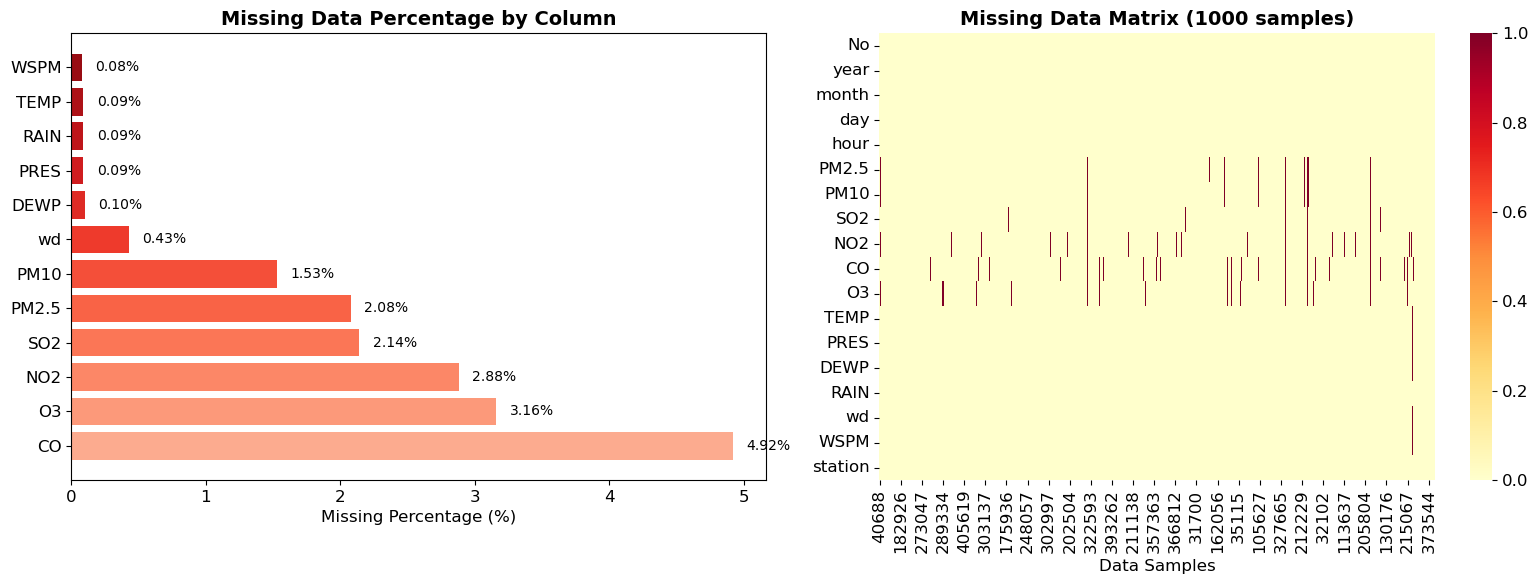

In [7]:
# Missing values analysis
print("MISSING VALUES ANALYSIS:")
print("="*70)

missing_df = pd.DataFrame({
    'Missing Count': df.isnull().sum(),
    'Percentage (%)': (df.isnull().sum() / len(df) * 100).round(2)
}).sort_values('Percentage (%)', ascending=False)

missing_df = missing_df[missing_df['Missing Count'] > 0]
print(missing_df)

# Visualize missing values
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart missing percentage
if len(missing_df) > 0:
    colors = plt.cm.Reds(np.linspace(0.3, 0.9, len(missing_df)))
    bars = axes[0].barh(missing_df.index, missing_df['Percentage (%)'], color=colors)
    axes[0].set_xlabel('Missing Percentage (%)')
    axes[0].set_title('Missing Data Percentage by Column', fontweight='bold')
    for bar, val in zip(bars, missing_df['Percentage (%)']):
        axes[0].text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, 
                     f'{val:.2f}%', va='center', fontsize=10)
else:
    axes[0].text(0.5, 0.5, 'No missing data!', ha='center', va='center', fontsize=14)
    axes[0].set_title('Missing Data Percentage', fontweight='bold')

# Heatmap missing values
missing_matrix = df.isnull().astype(int)
sample_missing = missing_matrix.sample(min(1000, len(df)), random_state=42)
sns.heatmap(sample_missing.T, cbar=True, yticklabels=df.columns, 
            cmap='YlOrRd', ax=axes[1])
axes[1].set_title('Missing Data Matrix (1000 samples)', fontweight='bold')
axes[1].set_xlabel('Data Samples')

plt.tight_layout()
plt.show()


## 4. DATA PREPROCESSING

### 4.1 Create Datetime Column and Handle Missing Values


In [8]:
# =============================================================================
# 4. DATA PREPROCESSING
# =============================================================================

# Create datetime column
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df['date'] = df['datetime'].dt.date

# Create additional time columns
df['weekday'] = df['datetime'].dt.dayofweek  # 0 = Monday
df['weekday_name'] = df['datetime'].dt.day_name()
df['is_weekend'] = df['weekday'].isin([5, 6]).astype(int)

# Create season column
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Winter'

df['season'] = df['month'].apply(get_season)

# Create time of day classification
def get_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['time_of_day'] = df['hour'].apply(get_time_of_day)

print("Created additional time columns!")
print(f"   - datetime, date")
print(f"   - weekday, weekday_name, is_weekend")
print(f"   - season, time_of_day")


Created additional time columns!
   - datetime, date
   - weekday, weekday_name, is_weekend
   - season, time_of_day


In [9]:
# Handle missing values using interpolation
numeric_cols = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

# Save missing count before processing
missing_before = df[numeric_cols].isnull().sum()

# Handle missing values
for col in numeric_cols:
    # Sort by station and time before interpolating
    df[col] = df.groupby('station')[col].transform(
        lambda x: x.interpolate(method='linear', limit_direction='both')
    )
    # If still NaN (start/end of series), fill with station median
    df[col] = df.groupby('station')[col].transform(
        lambda x: x.fillna(x.median())
    )

# Check after processing
missing_after = df[numeric_cols].isnull().sum()

print("MISSING DATA HANDLING RESULTS:")
print("="*60)
comparison = pd.DataFrame({
    'Before': missing_before,
    'After': missing_after
})
print(comparison[comparison['Before'] > 0])


MISSING DATA HANDLING RESULTS:
       Before  After
PM2.5    8739      0
PM10     6449      0
SO2      9021      0
NO2     12116      0
CO      20701      0
O3      13277      0
TEMP      398      0
PRES      393      0
DEWP      403      0
RAIN      390      0
WSPM      318      0


## 5. DESCRIPTIVE STATISTICS


In [10]:
# =============================================================================
# 5. DESCRIPTIVE STATISTICS
# =============================================================================

print("DESCRIPTIVE STATISTICS FOR POLLUTANTS AND WEATHER:")
print("="*100)

pollutant_cols = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
weather_cols = ['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

# Descriptive statistics
desc_stats = df[pollutant_cols + weather_cols].describe().T
desc_stats['range'] = desc_stats['max'] - desc_stats['min']
desc_stats['cv'] = (desc_stats['std'] / desc_stats['mean'] * 100).round(2)  # Coefficient of Variation

print("\nPOLLUTANT INDICATORS:")
print(desc_stats.loc[pollutant_cols])

print("\nWEATHER FACTORS:")
print(desc_stats.loc[weather_cols])


DESCRIPTIVE STATISTICS FOR POLLUTANTS AND WEATHER:

POLLUTANT INDICATORS:
          count    mean     std    min    25%    50%     75%      max   range  \
PM2.5 420768.00   79.84   80.95   2.00  20.00  55.00  111.00   999.00  997.00   
PM10  420768.00  104.91   92.43   2.00  36.00  82.00  145.00   999.00  997.00   
SO2   420768.00   15.91   21.90   0.29   3.00   7.00   20.00   500.00  499.71   
NO2   420768.00   50.60   35.17   1.03  23.00  43.00   71.00   290.00  288.97   
CO    420768.00 1235.68 1161.79 100.00 500.00 900.00 1500.00 10000.00 9900.00   
O3    420768.00   57.24   57.14   0.21  10.00  44.00   82.00  1071.00 1070.79   

          cv  
PM2.5 101.39  
PM10   88.11  
SO2   137.60  
NO2    69.51  
CO     94.02  
O3     99.82  

WEATHER FACTORS:
         count    mean   std    min     25%     50%     75%     max  range  \
TEMP 420768.00   13.53 11.44 -19.90    3.10   14.50   23.30   41.60  61.50   
PRES 420768.00 1010.75 10.47 982.40 1002.30 1010.40 1019.00 1042.80  60.40   
D

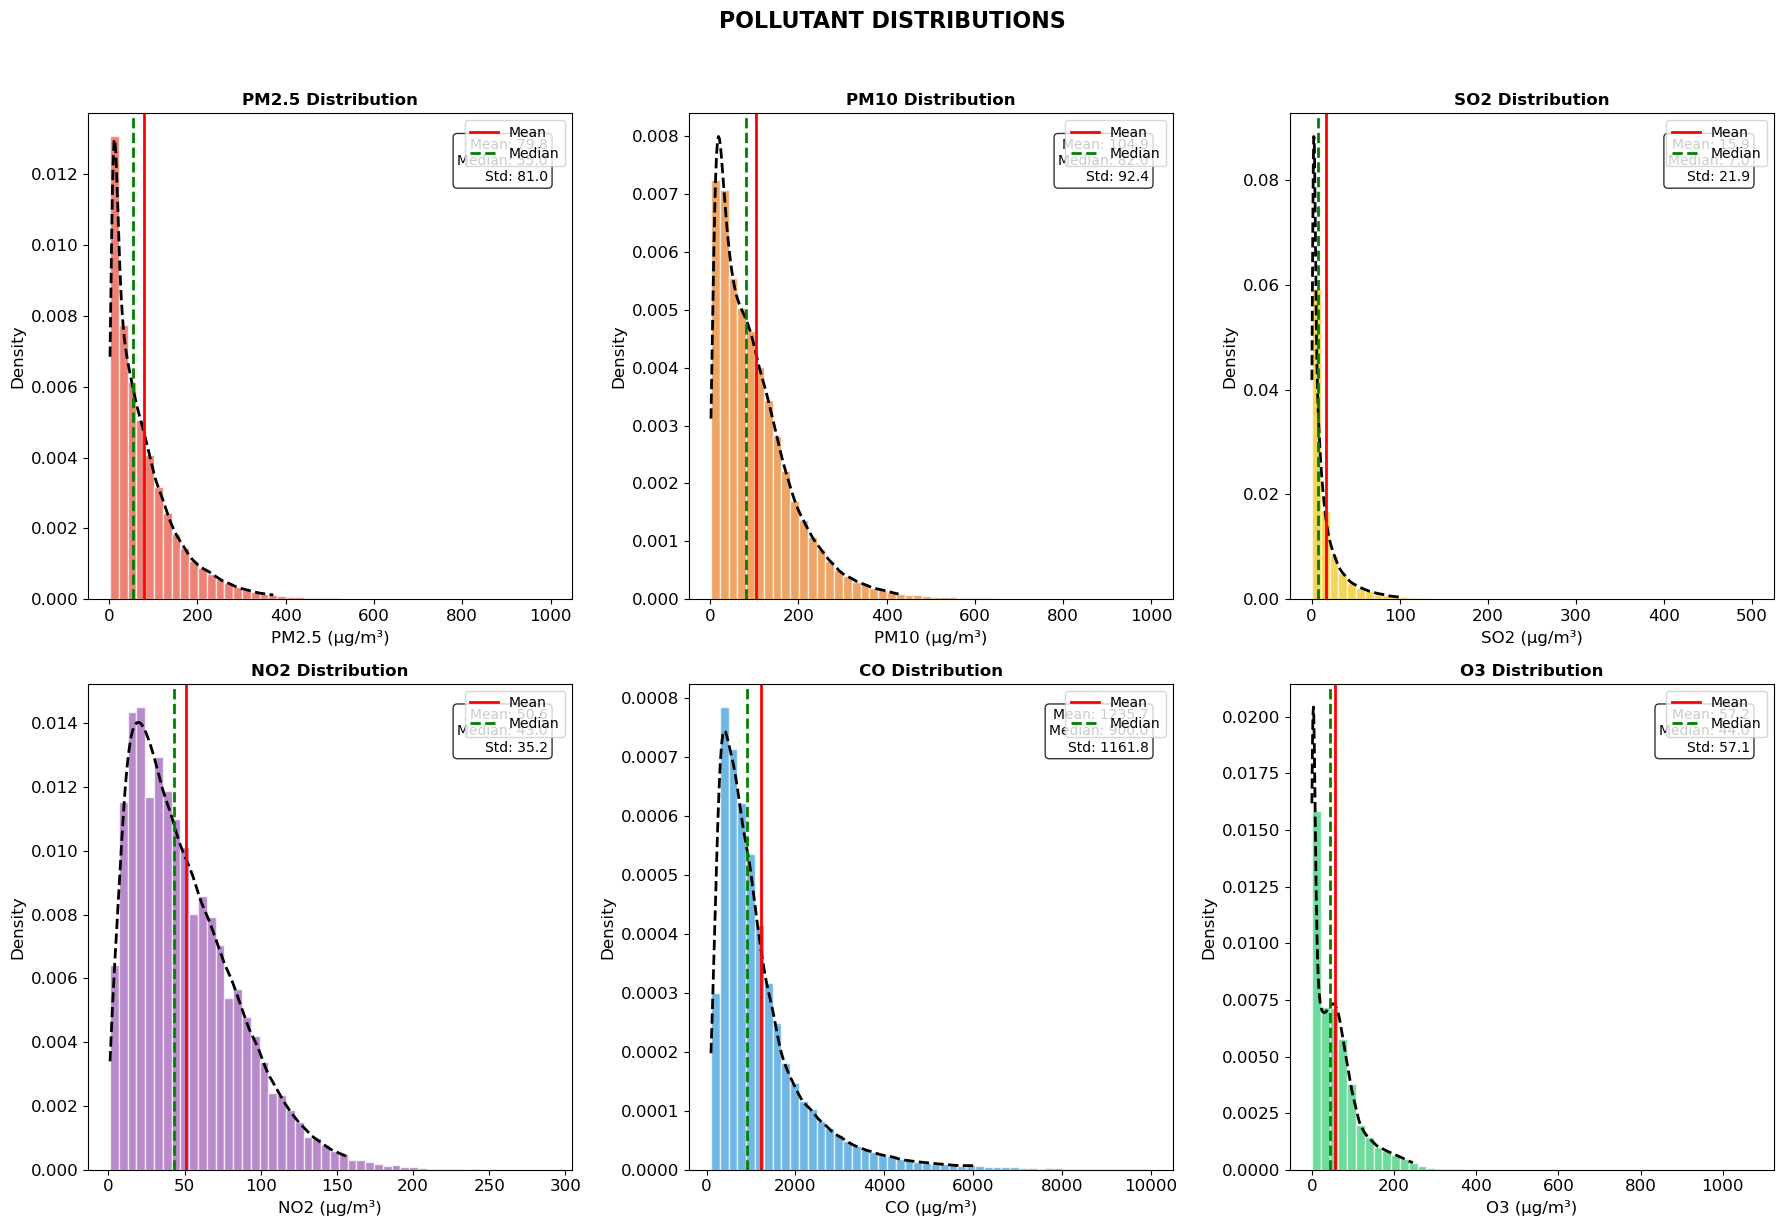

In [11]:
# Visualize pollutant distributions
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

colors = ['#E74C3C', '#E67E22', '#F1C40F', '#9B59B6', '#3498DB', '#2ECC71']

for idx, (col, color) in enumerate(zip(pollutant_cols, colors)):
    ax = axes[idx]
    
    # Histogram with KDE
    data = df[col].dropna()
    ax.hist(data, bins=50, density=True, alpha=0.7, color=color, edgecolor='white')
    
    # KDE line
    from scipy import stats
    kde = stats.gaussian_kde(data)
    x_range = np.linspace(data.min(), data.quantile(0.99), 200)
    ax.plot(x_range, kde(x_range), color='black', linewidth=2, linestyle='--')
    
    # Statistics box
    mean_val = data.mean()
    median_val = data.median()
    std_val = data.std()
    
    textstr = f'Mean: {mean_val:.1f}\nMedian: {median_val:.1f}\nStd: {std_val:.1f}'
    ax.text(0.95, 0.95, textstr, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', horizontalalignment='right',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    ax.set_title(f'{col} Distribution', fontweight='bold', fontsize=12)
    ax.set_xlabel(f'{col} (μg/m³)')
    ax.set_ylabel('Density')
    ax.axvline(mean_val, color='red', linestyle='-', linewidth=2, label='Mean')
    ax.axvline(median_val, color='green', linestyle='--', linewidth=2, label='Median')
    ax.legend(loc='upper right')

plt.suptitle('POLLUTANT DISTRIBUTIONS', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


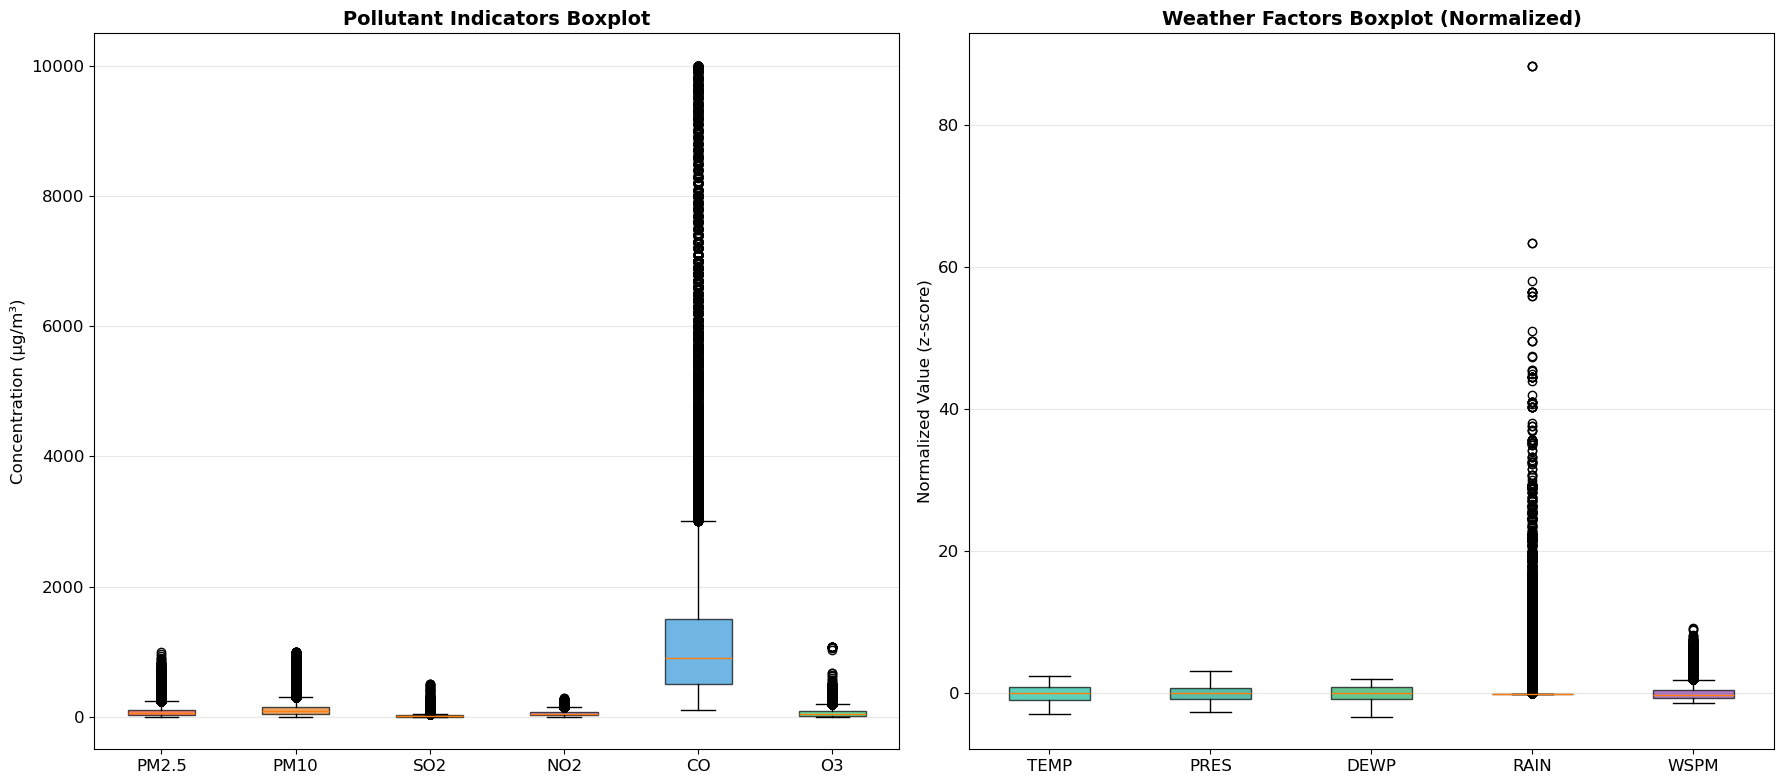

In [12]:
# Boxplot pollutant indicators
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Boxplot pollutant indicators
bp1 = axes[0].boxplot([df[col].dropna() for col in pollutant_cols], 
                       labels=pollutant_cols, patch_artist=True)
colors_box = ['#E74C3C', '#E67E22', '#F1C40F', '#9B59B6', '#3498DB', '#2ECC71']
for patch, color in zip(bp1['boxes'], colors_box):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
axes[0].set_title('Pollutant Indicators Boxplot', fontweight='bold', fontsize=14)
axes[0].set_ylabel('Concentration (μg/m³)')
axes[0].grid(axis='y', alpha=0.3)

# Boxplot weather factors (normalized for comparison)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
weather_scaled = scaler.fit_transform(df[weather_cols].dropna())

bp2 = axes[1].boxplot([weather_scaled[:, i] for i in range(len(weather_cols))], 
                       labels=weather_cols, patch_artist=True)
colors_weather = ['#1ABC9C', '#16A085', '#27AE60', '#2980B9', '#8E44AD']
for patch, color in zip(bp2['boxes'], colors_weather):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
axes[1].set_title('Weather Factors Boxplot (Normalized)', fontweight='bold', fontsize=14)
axes[1].set_ylabel('Normalized Value (z-score)')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


## 6. AIR QUALITY INDEX (AQI) ANALYSIS

### 6.1 Calculate Composite AQI from 6 Pollutants

According to EPA (Environmental Protection Agency) standards, AQI is calculated from **6 main pollutants**:
- **PM2.5** (Particulate Matter 2.5 μm)
- **PM10** (Particulate Matter 10 μm)
- **O3** (Ozone)
- **NO2** (Nitrogen Dioxide)
- **SO2** (Sulfur Dioxide)
- **CO** (Carbon Monoxide)

**Composite AQI = MAX(AQI of each pollutant)**

AQI Levels:
- **0-50**: Good
- **51-100**: Moderate
- **101-150**: Unhealthy for Sensitive Groups
- **151-200**: Unhealthy
- **201-300**: Very Unhealthy
- **301-500**: Hazardous 


In [13]:
# =============================================================================
# 6. CALCULATE COMPOSITE AQI FROM 6 POLLUTANTS (EPA STANDARD)
# =============================================================================

def calculate_aqi_linear(concentration, breakpoints):
    """
    Calculate AQI using EPA linear formula
    breakpoints: list of (C_lo, C_hi, I_lo, I_hi)
    """
    if pd.isna(concentration) or concentration < 0:
        return np.nan
    
    for c_lo, c_hi, i_lo, i_hi in breakpoints:
        if c_lo <= concentration <= c_hi:
            aqi = ((i_hi - i_lo) / (c_hi - c_lo)) * (concentration - c_lo) + i_lo
            return round(aqi)
    
    # If exceeds highest threshold
    if concentration > breakpoints[-1][1]:
        return 500
    return np.nan

# ==================== EPA STANDARD BREAKPOINTS ====================
# Format: (C_lo, C_hi, I_lo, I_hi)

# PM2.5 (μg/m³) - 24-hour average
PM25_BREAKPOINTS = [
    (0.0, 12.0, 0, 50),
    (12.1, 35.4, 51, 100),
    (35.5, 55.4, 101, 150),
    (55.5, 150.4, 151, 200),
    (150.5, 250.4, 201, 300),
    (250.5, 500.4, 301, 500),
]

# PM10 (μg/m³) - 24-hour average
PM10_BREAKPOINTS = [
    (0, 54, 0, 50),
    (55, 154, 51, 100),
    (155, 254, 101, 150),
    (255, 354, 151, 200),
    (355, 424, 201, 300),
    (425, 604, 301, 500),
]

# O3 (μg/m³) - 8-hour average
O3_BREAKPOINTS = [
    (0, 108, 0, 50),
    (109, 140, 51, 100),
    (141, 170, 101, 150),
    (171, 210, 151, 200),
    (211, 400, 201, 300),
    (401, 800, 301, 500),
]

# NO2 (μg/m³) - 1-hour average
NO2_BREAKPOINTS = [
    (0, 100, 0, 50),
    (101, 188, 51, 100),
    (189, 677, 101, 150),
    (678, 1221, 151, 200),
    (1222, 2350, 201, 300),
    (2351, 3850, 301, 500),
]

# SO2 (μg/m³) - 1-hour average
SO2_BREAKPOINTS = [
    (0, 92, 0, 50),
    (93, 197, 51, 100),
    (198, 487, 101, 150),
    (488, 797, 151, 200),
    (798, 1583, 201, 300),
    (1584, 2630, 301, 500),
]

# CO (mg/m³) - 8-hour average
CO_BREAKPOINTS = [
    (0, 5.0, 0, 50),
    (5.1, 10.5, 51, 100),
    (10.6, 14.3, 101, 150),
    (14.4, 17.6, 151, 200),
    (17.7, 34.8, 201, 300),
    (34.9, 57.5, 301, 500),
]

# ==================== CALCULATE AQI FOR EACH POLLUTANT ====================
print("Calculating AQI for each pollutant...")

df['AQI_PM25'] = df['PM2.5'].apply(lambda x: calculate_aqi_linear(x, PM25_BREAKPOINTS))
df['AQI_PM10'] = df['PM10'].apply(lambda x: calculate_aqi_linear(x, PM10_BREAKPOINTS))
df['AQI_O3'] = df['O3'].apply(lambda x: calculate_aqi_linear(x, O3_BREAKPOINTS))
df['AQI_NO2'] = df['NO2'].apply(lambda x: calculate_aqi_linear(x, NO2_BREAKPOINTS))
df['AQI_SO2'] = df['SO2'].apply(lambda x: calculate_aqi_linear(x, SO2_BREAKPOINTS))
df['AQI_CO'] = df['CO'].apply(lambda x: calculate_aqi_linear(x/1000, CO_BREAKPOINTS))  # CO: μg/m³ → mg/m³

# ==================== CALCULATE COMPOSITE AQI ====================
aqi_columns = ['AQI_PM25', 'AQI_PM10', 'AQI_O3', 'AQI_NO2', 'AQI_SO2', 'AQI_CO']
df['AQI'] = df[aqi_columns].max(axis=1)

# ==================== DETERMINE DOMINANT POLLUTANT ====================
def get_dominant_pollutant(row):
    """Determine the main pollutant (highest AQI)"""
    pollutants = ['PM25', 'PM10', 'O3', 'NO2', 'SO2', 'CO']
    aqi_values = [row[f'AQI_{p}'] for p in pollutants]
    if all(pd.isna(aqi_values)):
        return 'Unknown'
    max_idx = np.nanargmax(aqi_values)
    return pollutants[max_idx]

df['Dominant_Pollutant'] = df.apply(get_dominant_pollutant, axis=1)

# ==================== CLASSIFY AQI LEVELS ====================
def get_aqi_category(aqi):
    if pd.isna(aqi):
        return 'Unknown'
    elif aqi <= 50:
        return 'Good'
    elif aqi <= 100:
        return 'Moderate'
    elif aqi <= 150:
        return 'Unhealthy for Sensitive Groups'
    elif aqi <= 200:
        return 'Unhealthy'
    elif aqi <= 300:
        return 'Very Unhealthy'
    else:
        return 'Hazardous'

df['AQI_Category'] = df['AQI'].apply(get_aqi_category)

print("\nCOMPOSITE AQI CALCULATED FROM 6 POLLUTANTS!")
print("="*70)
print(f"\nCOMPOSITE AQI STATISTICS:")
print(f"   - Min: {df['AQI'].min():.0f}")
print(f"   - Max: {df['AQI'].max():.0f}")
print(f"   - Mean: {df['AQI'].mean():.1f}")
print(f"   - Median: {df['AQI'].median():.1f}")

print(f"\nAQI STATISTICS BY POLLUTANT:")
for col in aqi_columns:
    pollutant = col.replace('AQI_', '')
    print(f"   - {pollutant:5s}: Mean={df[col].mean():.1f}, Max={df[col].max():.0f}")


Calculating AQI for each pollutant...

COMPOSITE AQI CALCULATED FROM 6 POLLUTANTS!

COMPOSITE AQI STATISTICS:
   - Min: 12
   - Max: 500
   - Mean: 143.5
   - Median: 152.0

AQI STATISTICS BY POLLUTANT:
   - PM25 : Mean=138.3, Max=500
   - PM10 : Mean=72.9, Max=500
   - O3   : Mean=34.5, Max=500
   - NO2  : Mean=25.5, Max=111
   - SO2  : Mean=8.6, Max=153
   - CO   : Mean=12.3, Max=95


In [14]:
# =============================================================================
# AQI DISTRIBUTION AND DOMINANT POLLUTANT
# =============================================================================

print("AIR QUALITY DISTRIBUTION BY AQI LEVEL:")
print("="*70)

aqi_dist = df['AQI_Category'].value_counts()
aqi_pct = (aqi_dist / len(df) * 100).round(2)

aqi_order = ['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 
             'Unhealthy', 'Very Unhealthy', 'Hazardous']

for cat in aqi_order:
    if cat in aqi_dist.index:
        count = aqi_dist[cat]
        pct = aqi_pct[cat]
        print(f"  • {cat:35} : {count:>8,} ({pct:>5.2f}%)")

# ==================== DOMINANT POLLUTANT ANALYSIS ====================
print("\n" + "="*70)
print("DOMINANT POLLUTANT:")
print("="*70)

dom_dist = df['Dominant_Pollutant'].value_counts()
dom_pct = (dom_dist / len(df) * 100).round(2)

pollutant_names = {
    'PM25': 'PM2.5 (Fine Particles 2.5μm)',
    'PM10': 'PM10 (Particles 10μm)',
    'O3': 'O3 (Ozone)',
    'NO2': 'NO2 (Nitrogen Dioxide)',
    'SO2': 'SO2 (Sulfur Dioxide)',
    'CO': 'CO (Carbon Monoxide)'
}

for pol in ['PM25', 'PM10', 'O3', 'NO2', 'SO2', 'CO']:
    if pol in dom_dist.index:
        count = dom_dist[pol]
        pct = dom_pct[pol]
        name = pollutant_names.get(pol, pol)
        print(f"  • {name:30} : {count:>8,} ({pct:>5.2f}%)")


AIR QUALITY DISTRIBUTION BY AQI LEVEL:
  • Good                                :   56,757 (13.49%)
  • Moderate                            :   92,447 (21.97%)
  • Unhealthy for Sensitive Groups      :   54,485 (12.95%)
  • Unhealthy                           :  142,199 (33.80%)
  • Very Unhealthy                      :   54,864 (13.04%)
  • Hazardous                           :   20,016 ( 4.76%)

DOMINANT POLLUTANT:
  • PM2.5 (Fine Particles 2.5μm)   :  355,586 (84.51%)
  • PM10 (Particles 10μm)          :   16,313 ( 3.88%)
  • O3 (Ozone)                     :   47,716 (11.34%)
  • NO2 (Nitrogen Dioxide)         :      985 ( 0.23%)
  • SO2 (Sulfur Dioxide)           :       48 ( 0.01%)
  • CO (Carbon Monoxide)           :      120 ( 0.03%)


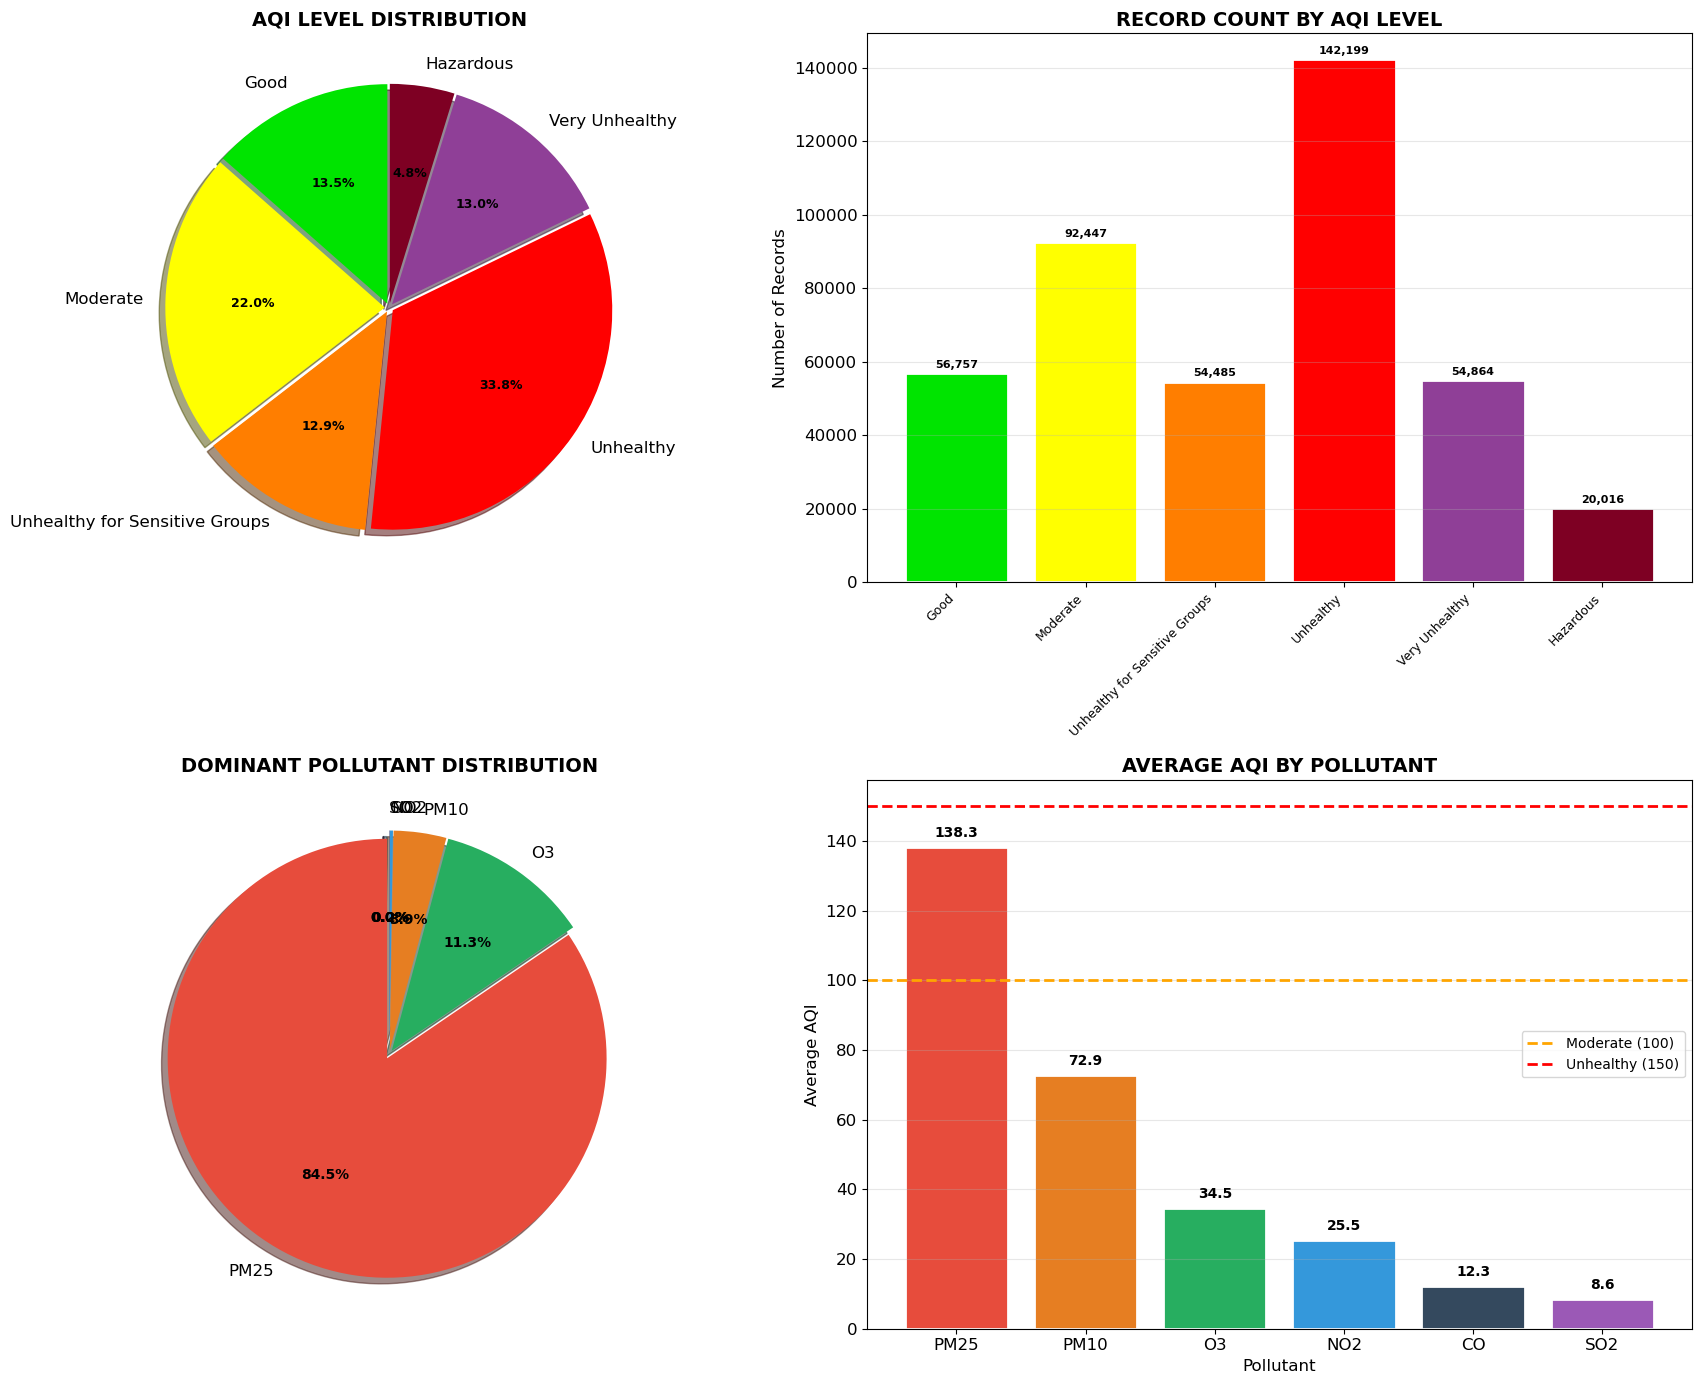

In [15]:
# =============================================================================
# VISUALIZE AQI DISTRIBUTION AND DOMINANT POLLUTANT
# =============================================================================

fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# 1. Pie chart - AQI Categories
aqi_counts = df['AQI_Category'].value_counts().reindex(aqi_order).dropna()
colors_pie = [AQI_COLORS.get(cat, '#808080') for cat in aqi_counts.index]

wedges, texts, autotexts = axes[0, 0].pie(aqi_counts.values, labels=aqi_counts.index, 
                                           autopct='%1.1f%%', colors=colors_pie,
                                           explode=[0.02]*len(aqi_counts),
                                           shadow=True, startangle=90)
for autotext in autotexts:
    autotext.set_fontsize(9)
    autotext.set_fontweight('bold')
axes[0, 0].set_title('AQI LEVEL DISTRIBUTION', fontweight='bold', fontsize=14)

# 2. Bar chart - AQI Categories
bars = axes[0, 1].bar(range(len(aqi_counts)), aqi_counts.values, color=colors_pie, 
                       edgecolor='white', linewidth=2)
axes[0, 1].set_xticks(range(len(aqi_counts)))
axes[0, 1].set_xticklabels(aqi_counts.index, rotation=45, ha='right', fontsize=9)
axes[0, 1].set_ylabel('Number of Records')
axes[0, 1].set_title('RECORD COUNT BY AQI LEVEL', fontweight='bold', fontsize=14)
for bar, val in zip(bars, aqi_counts.values):
    axes[0, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1000,
                    f'{val:,}', ha='center', va='bottom', fontsize=8, fontweight='bold')
axes[0, 1].grid(axis='y', alpha=0.3)

# 3. Pie chart - Dominant Pollutant
dom_colors = {'PM25': '#E74C3C', 'PM10': '#E67E22', 'O3': '#27AE60', 
              'NO2': '#3498DB', 'SO2': '#9B59B6', 'CO': '#34495E'}
dom_counts = df['Dominant_Pollutant'].value_counts()
dom_labels = [pollutant_names.get(p, p) for p in dom_counts.index]
dom_cols = [dom_colors.get(p, '#808080') for p in dom_counts.index]

wedges, texts, autotexts = axes[1, 0].pie(dom_counts.values, labels=dom_counts.index, 
                                           autopct='%1.1f%%', colors=dom_cols,
                                           explode=[0.02]*len(dom_counts),
                                           shadow=True, startangle=90)
for autotext in autotexts:
    autotext.set_fontsize(10)
    autotext.set_fontweight('bold')
axes[1, 0].set_title('DOMINANT POLLUTANT DISTRIBUTION', fontweight='bold', fontsize=14)

# 4. Bar chart - Compare average AQI of each pollutant
aqi_means = {col.replace('AQI_', ''): df[col].mean() for col in aqi_columns}
aqi_means_sorted = dict(sorted(aqi_means.items(), key=lambda x: x[1], reverse=True))
colors_bar = [dom_colors.get(p, '#808080') for p in aqi_means_sorted.keys()]

bars = axes[1, 1].bar(aqi_means_sorted.keys(), aqi_means_sorted.values(), 
                       color=colors_bar, edgecolor='white', linewidth=2)
axes[1, 1].set_xlabel('Pollutant')
axes[1, 1].set_ylabel('Average AQI')
axes[1, 1].set_title('AVERAGE AQI BY POLLUTANT', fontweight='bold', fontsize=14)
axes[1, 1].axhline(y=100, color='orange', linestyle='--', linewidth=2, label='Moderate (100)')
axes[1, 1].axhline(y=150, color='red', linestyle='--', linewidth=2, label='Unhealthy (150)')
for bar, val in zip(bars, aqi_means_sorted.values()):
    axes[1, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2,
                    f'{val:.1f}', ha='center', va='bottom', fontsize=10, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


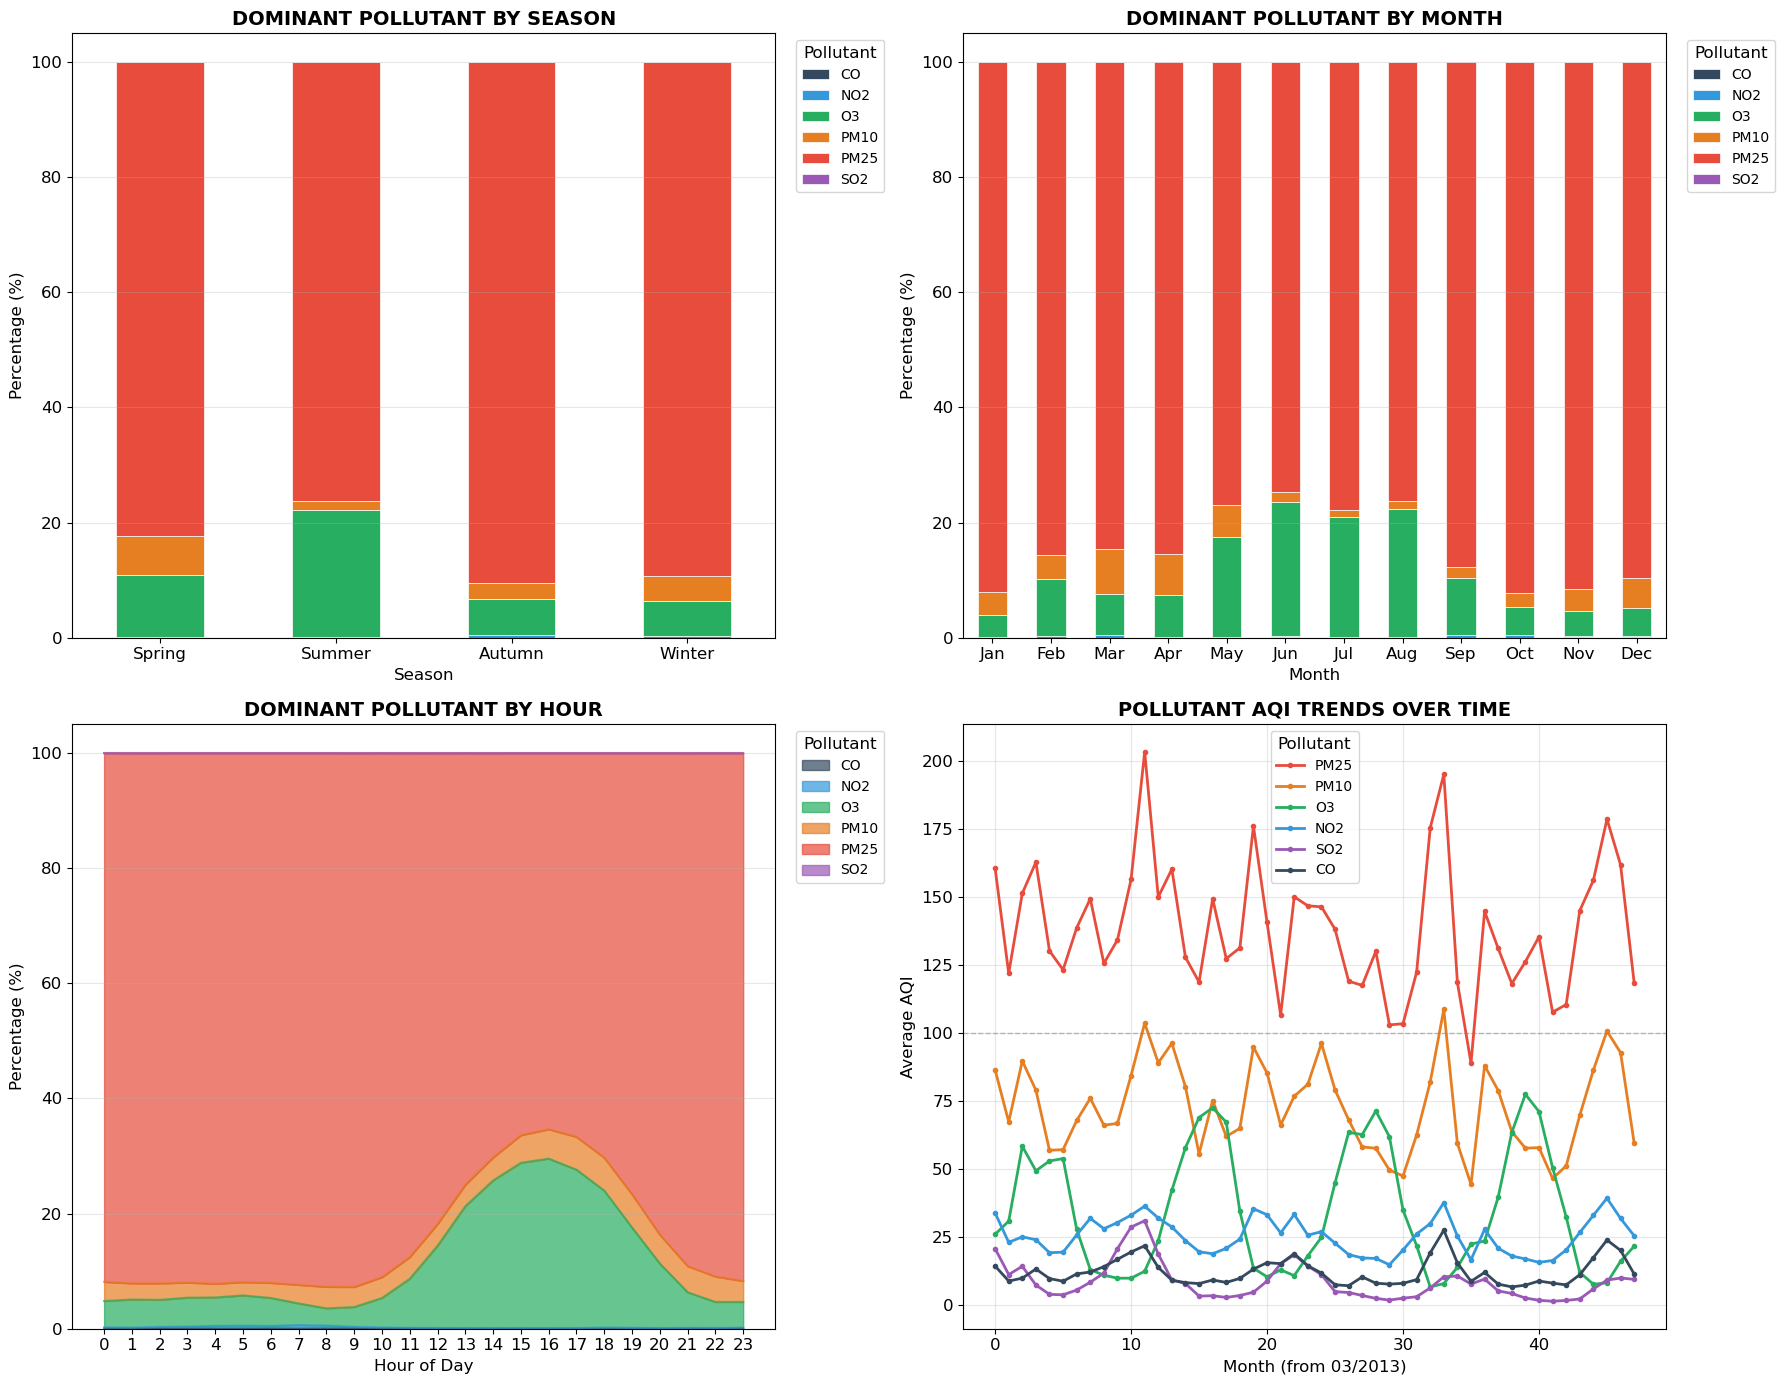


DOMINANT POLLUTANT OBSERVATIONS:
------------------------------------------------------------
• PM2.5 is the dominant pollutant 84.5% of the time
• O3 dominates in summer due to strong sunlight
• Winter: PM2.5/PM10 high due to heating and meteorological conditions


In [16]:
# =============================================================================
# DOMINANT POLLUTANT TEMPORAL ANALYSIS
# =============================================================================

# Redefine necessary variables
season_order = ['Spring', 'Summer', 'Autumn', 'Winter']
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
dom_colors = {'PM25': '#E74C3C', 'PM10': '#E67E22', 'O3': '#27AE60', 
              'NO2': '#3498DB', 'SO2': '#9B59B6', 'CO': '#34495E'}
aqi_columns = ['AQI_PM25', 'AQI_PM10', 'AQI_O3', 'AQI_NO2', 'AQI_SO2', 'AQI_CO']

fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# 1. Dominant Pollutant by Season
dom_by_season = pd.crosstab(df['season'], df['Dominant_Pollutant'], normalize='index') * 100
dom_by_season = dom_by_season.reindex(season_order)
dom_by_season.plot(kind='bar', stacked=True, ax=axes[0, 0], 
                    color=[dom_colors.get(c, '#808080') for c in dom_by_season.columns],
                    edgecolor='white', linewidth=0.5)
axes[0, 0].set_xlabel('Season')
axes[0, 0].set_ylabel('Percentage (%)')
axes[0, 0].set_title('DOMINANT POLLUTANT BY SEASON', fontweight='bold', fontsize=14)
axes[0, 0].legend(title='Pollutant', bbox_to_anchor=(1.02, 1), loc='upper left')
axes[0, 0].set_xticklabels(season_order, rotation=0)
axes[0, 0].grid(axis='y', alpha=0.3)

# 2. Dominant Pollutant by Month
dom_by_month = pd.crosstab(df['month'], df['Dominant_Pollutant'], normalize='index') * 100
dom_by_month.plot(kind='bar', stacked=True, ax=axes[0, 1],
                   color=[dom_colors.get(c, '#808080') for c in dom_by_month.columns],
                   edgecolor='white', linewidth=0.5)
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Percentage (%)')
axes[0, 1].set_title('DOMINANT POLLUTANT BY MONTH', fontweight='bold', fontsize=14)
axes[0, 1].legend(title='Pollutant', bbox_to_anchor=(1.02, 1), loc='upper left')
axes[0, 1].set_xticklabels(month_names, rotation=0)
axes[0, 1].grid(axis='y', alpha=0.3)

# 3. Dominant Pollutant by Hour
dom_by_hour = pd.crosstab(df['hour'], df['Dominant_Pollutant'], normalize='index') * 100
dom_by_hour.plot(kind='area', stacked=True, ax=axes[1, 0], alpha=0.7,
                  color=[dom_colors.get(c, '#808080') for c in dom_by_hour.columns])
axes[1, 0].set_xlabel('Hour of Day')
axes[1, 0].set_ylabel('Percentage (%)')
axes[1, 0].set_title('DOMINANT POLLUTANT BY HOUR', fontweight='bold', fontsize=14)
axes[1, 0].legend(title='Pollutant', bbox_to_anchor=(1.02, 1), loc='upper left')
axes[1, 0].set_xticks(range(0, 24))
axes[1, 0].grid(axis='y', alpha=0.3)

# 4. Pollutant AQI Trends Over Time (monthly rolling)
monthly_aqi = df.groupby(df['datetime'].dt.to_period('M'))[aqi_columns].mean()
for col in aqi_columns:
    label = col.replace('AQI_', '')
    color = dom_colors.get(label, '#808080')
    axes[1, 1].plot(range(len(monthly_aqi)), monthly_aqi[col], 
                    label=label, linewidth=2, color=color, marker='o', markersize=3)
axes[1, 1].set_xlabel('Month (from 03/2013)')
axes[1, 1].set_ylabel('Average AQI')
axes[1, 1].set_title('POLLUTANT AQI TRENDS OVER TIME', fontweight='bold', fontsize=14)
axes[1, 1].legend(title='Pollutant')
axes[1, 1].axhline(y=100, color='gray', linestyle='--', linewidth=1, alpha=0.5)
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\nDOMINANT POLLUTANT OBSERVATIONS:")
print("-"*60)
print(f"• PM2.5 is the dominant pollutant {dom_pct.get('PM25', 0):.1f}% of the time")
print(f"• O3 dominates in summer due to strong sunlight")
print(f"• Winter: PM2.5/PM10 high due to heating and meteorological conditions")


### 6.2 Correlation Analysis Between Pollutants and AQI

Analyzing relationships between:
- Pollutant concentrations (PM2.5, PM10, O3, NO2, SO2, CO)
- Weather factors (TEMP, PRES, DEWP, RAIN, WSPM)
- Composite AQI


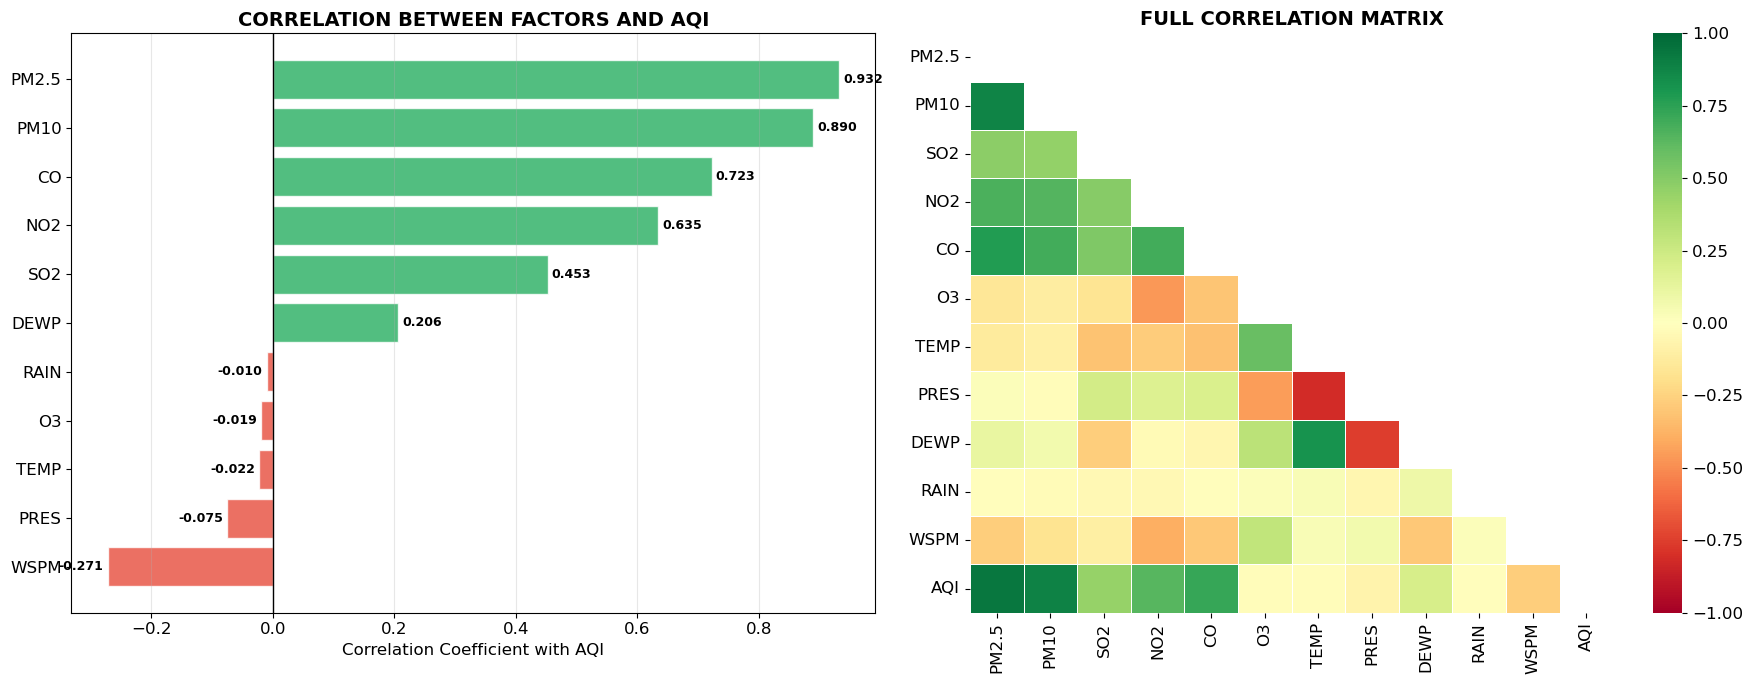


TOP 5 FACTORS WITH HIGHEST AQI CORRELATION:
--------------------------------------------------
  1. PM2.5   : +0.9321 (Positive)
  2. PM10    : +0.8900 (Positive)
  3. CO      : +0.7226 (Positive)
  4. NO2     : +0.6348 (Positive)
  5. SO2     : +0.4526 (Positive)


In [17]:
# =============================================================================
# CORRELATION ANALYSIS BETWEEN POLLUTANTS AND AQI
# =============================================================================

# Columns for analysis
correlation_cols = pollutant_cols + weather_cols + ['AQI']
corr_matrix = df[correlation_cols].corr()

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# 1. Bar chart - Correlation with AQI
aqi_corr = corr_matrix['AQI'].drop('AQI').sort_values(ascending=True)
colors_corr = ['#E74C3C' if x < 0 else '#27AE60' for x in aqi_corr.values]

bars = axes[0].barh(aqi_corr.index, aqi_corr.values, color=colors_corr, edgecolor='white', alpha=0.8)
axes[0].axvline(x=0, color='black', linewidth=1)
axes[0].set_xlabel('Correlation Coefficient with AQI')
axes[0].set_title('CORRELATION BETWEEN FACTORS AND AQI', fontweight='bold', fontsize=14)
axes[0].grid(axis='x', alpha=0.3)

# Add values on bars
for bar, val in zip(bars, aqi_corr.values):
    width = bar.get_width()
    axes[0].annotate(f'{val:.3f}',
                     xy=(width, bar.get_y() + bar.get_height()/2),
                     xytext=(3 if width >= 0 else -3, 0),
                     textcoords="offset points",
                     ha='left' if width >= 0 else 'right', va='center',
                     fontsize=9, fontweight='bold')

# 2. Full correlation matrix heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='RdYlGn',
            center=0, linewidths=0.5, ax=axes[1], vmin=-1, vmax=1,
            annot_kws={'size': 8})
axes[1].set_title('FULL CORRELATION MATRIX', fontweight='bold', fontsize=14)

plt.tight_layout()
plt.show()

# Print top correlations
print("\nTOP 5 FACTORS WITH HIGHEST AQI CORRELATION:")
print("-"*50)
aqi_corr_abs = aqi_corr.abs().sort_values(ascending=False)
for i, (feat, corr) in enumerate(aqi_corr_abs.head(5).items()):
    orig_corr = aqi_corr[feat]
    direction = "Positive" if orig_corr > 0 else "Negative"
    print(f"  {i+1}. {feat:8s}: {orig_corr:+.4f} ({direction})")


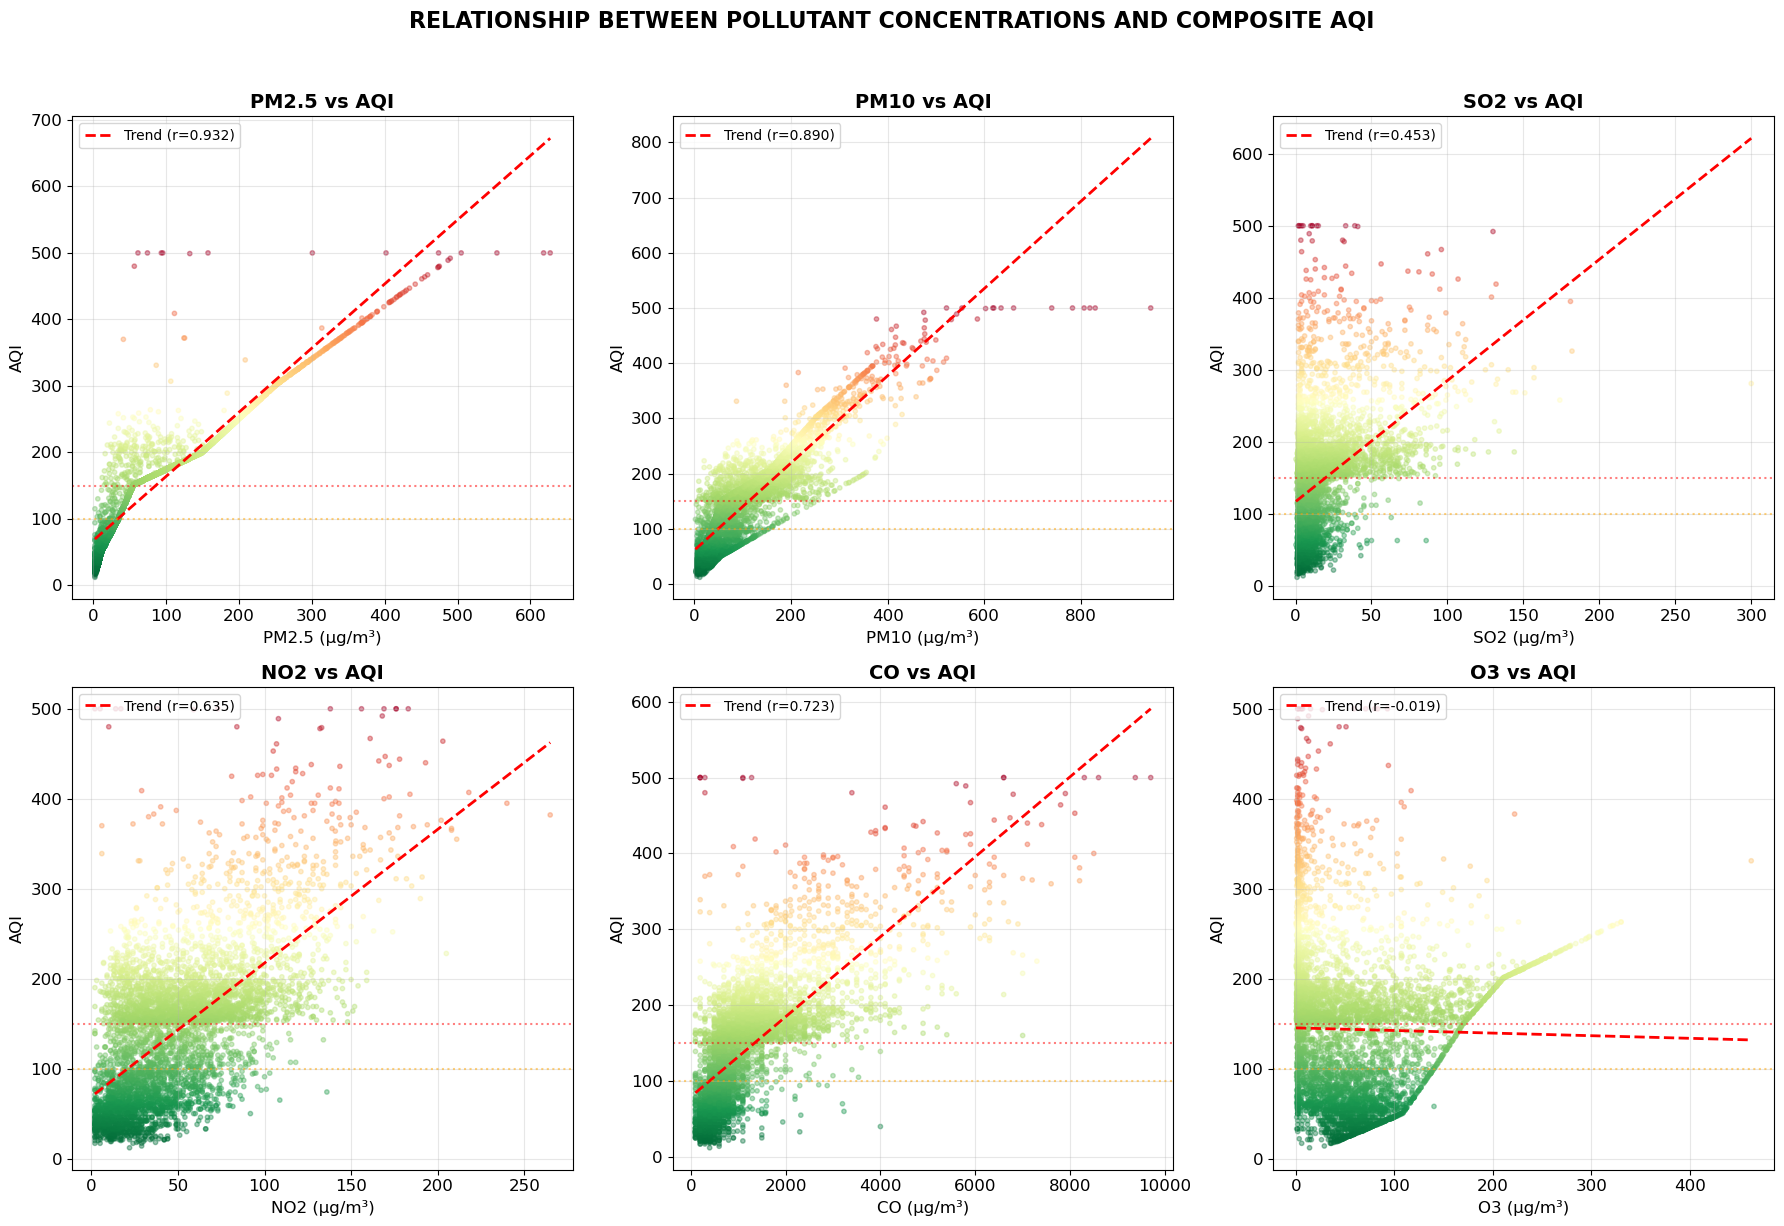

In [18]:
# =============================================================================
# SCATTER PLOTS: POLLUTANT CONCENTRATIONS VS AQI
# =============================================================================

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Sample data for faster visualization
sample_df = df.sample(min(5000, len(df)), random_state=42)

for idx, pollutant in enumerate(pollutant_cols):
    row, col = idx // 3, idx % 3
    ax = axes[row, col]
    
    # Scatter colored by AQI
    scatter = ax.scatter(sample_df[pollutant], sample_df['AQI'], 
                         c=sample_df['AQI'], cmap='RdYlGn_r', 
                         alpha=0.4, s=10)
    
    # Calculate correlation
    corr = df[pollutant].corr(df['AQI'])
    
    # Trend line
    z = np.polyfit(sample_df[pollutant].dropna(), 
                   sample_df.loc[sample_df[pollutant].notna(), 'AQI'], 1)
    p = np.poly1d(z)
    x_line = np.linspace(sample_df[pollutant].min(), sample_df[pollutant].max(), 100)
    ax.plot(x_line, p(x_line), 'r--', linewidth=2, label=f'Trend (r={corr:.3f})')
    
    ax.set_xlabel(f'{pollutant} (μg/m³)')
    ax.set_ylabel('AQI')
    ax.set_title(f'{pollutant} vs AQI', fontweight='bold')
    ax.legend(loc='upper left')
    ax.grid(alpha=0.3)
    
    # Add AQI thresholds
    ax.axhline(y=100, color='orange', linestyle=':', alpha=0.5)
    ax.axhline(y=150, color='red', linestyle=':', alpha=0.5)

plt.suptitle('RELATIONSHIP BETWEEN POLLUTANT CONCENTRATIONS AND COMPOSITE AQI', 
             fontweight='bold', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


### 6.2 PM2.5 Temporal Analysis


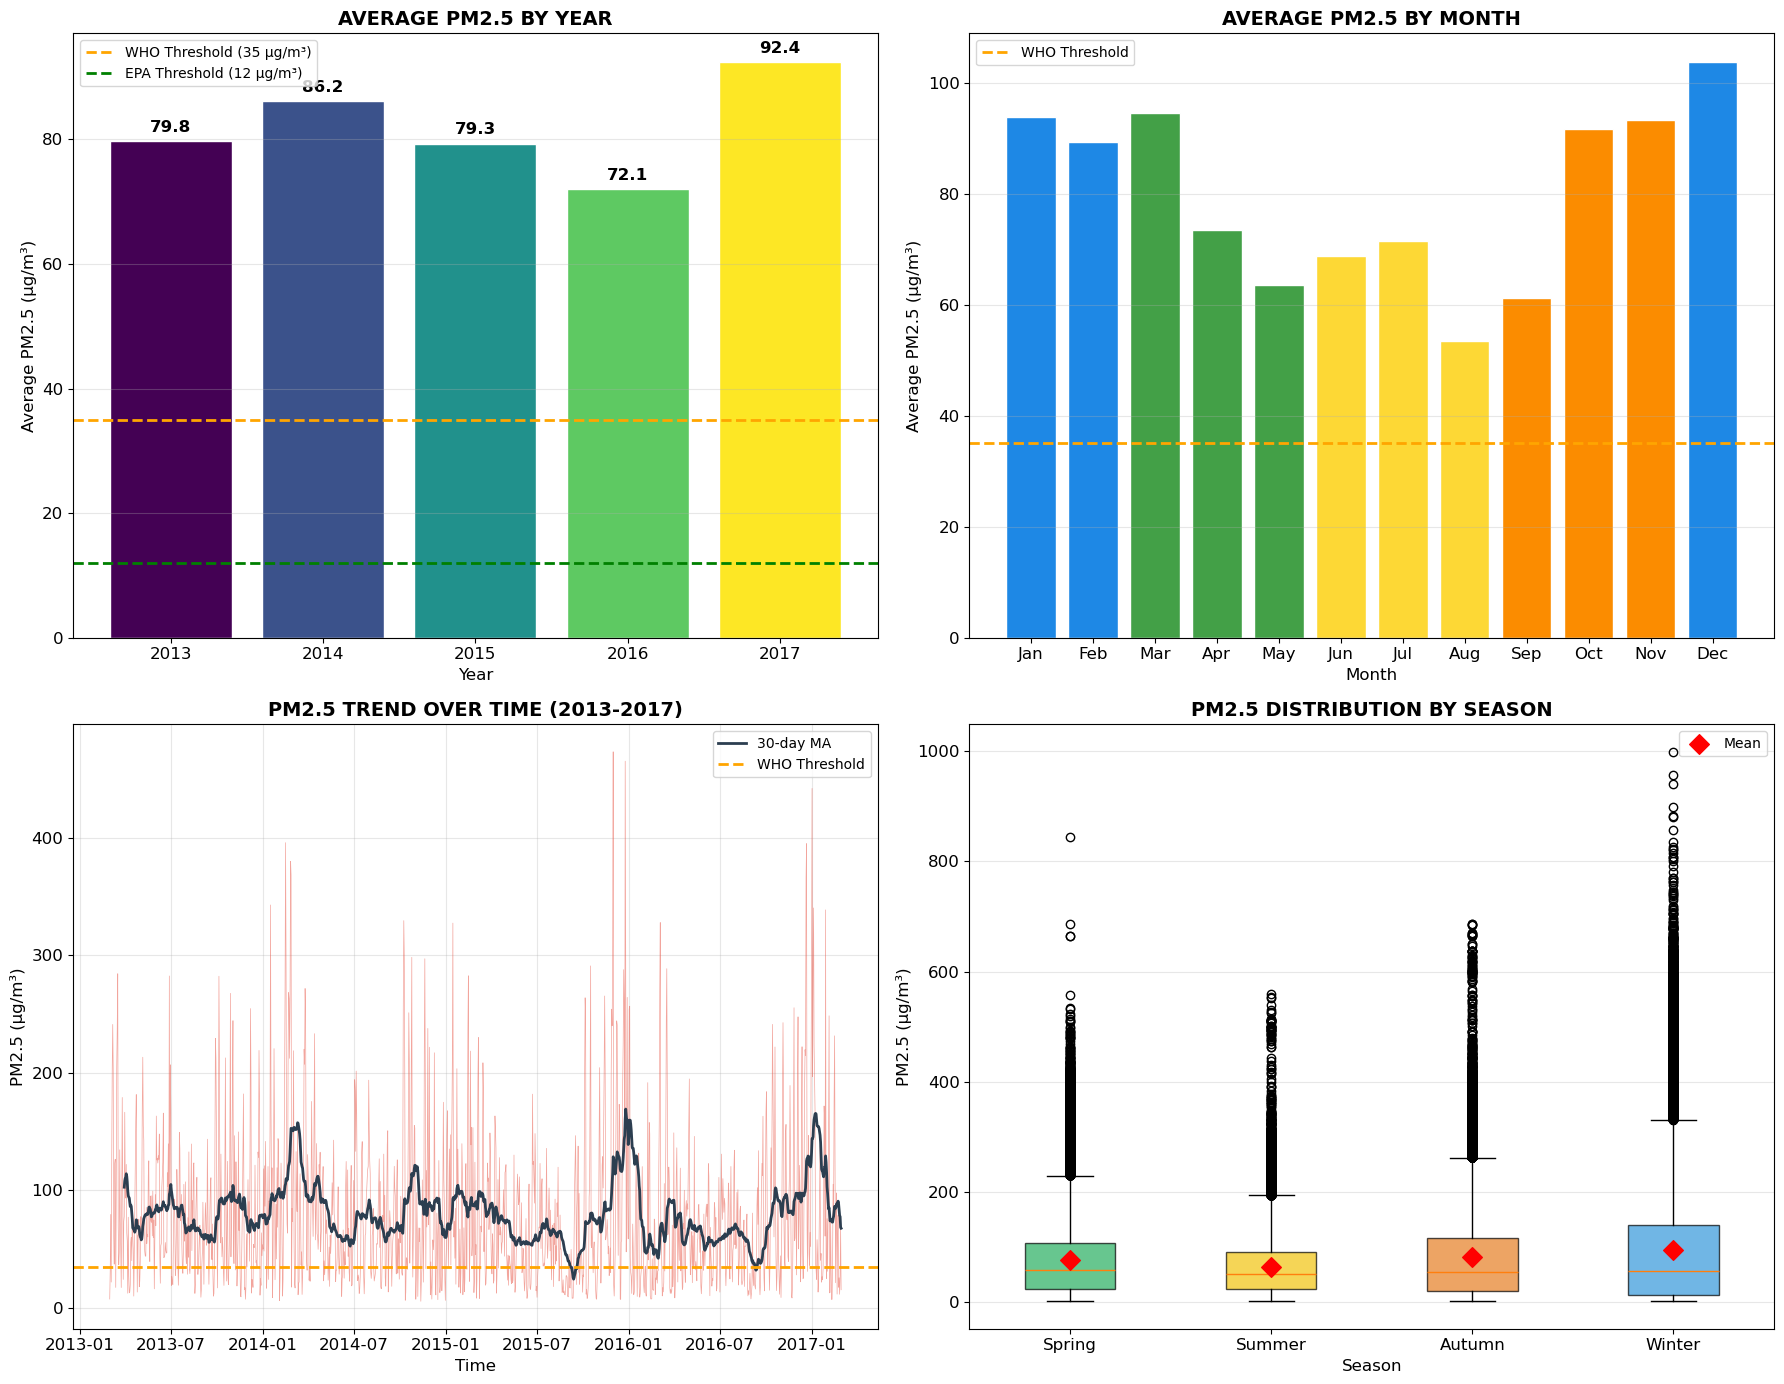

In [19]:
# PM2.5 by Year
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# 1. Average PM2.5 by Year
pm25_by_year = df.groupby('year')['PM2.5'].mean()
colors_year = plt.cm.viridis(np.linspace(0, 1, len(pm25_by_year)))
bars = axes[0, 0].bar(pm25_by_year.index, pm25_by_year.values, color=colors_year, edgecolor='white')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Average PM2.5 (μg/m³)')
axes[0, 0].set_title('AVERAGE PM2.5 BY YEAR', fontweight='bold', fontsize=14)
axes[0, 0].axhline(y=35, color='orange', linestyle='--', linewidth=2, label='WHO Threshold (35 μg/m³)')
axes[0, 0].axhline(y=12, color='green', linestyle='--', linewidth=2, label='EPA Threshold (12 μg/m³)')
axes[0, 0].legend()
for bar, val in zip(bars, pm25_by_year.values):
    axes[0, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                    f'{val:.1f}', ha='center', va='bottom', fontweight='bold')
axes[0, 0].grid(axis='y', alpha=0.3)

# 2. Average PM2.5 by Month
pm25_by_month = df.groupby('month')['PM2.5'].mean()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
colors_month = ['#1E88E5' if m in [12, 1, 2] else '#43A047' if m in [3, 4, 5] 
                else '#FDD835' if m in [6, 7, 8] else '#FB8C00' for m in range(1, 13)]
bars = axes[0, 1].bar(range(1, 13), pm25_by_month.values, color=colors_month, edgecolor='white')
axes[0, 1].set_xticks(range(1, 13))
axes[0, 1].set_xticklabels(month_names)
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Average PM2.5 (μg/m³)')
axes[0, 1].set_title('AVERAGE PM2.5 BY MONTH', fontweight='bold', fontsize=14)
axes[0, 1].axhline(y=35, color='orange', linestyle='--', linewidth=2, label='WHO Threshold')
axes[0, 1].legend()
axes[0, 1].grid(axis='y', alpha=0.3)

# 3. PM2.5 Trend Over Time (daily average)
daily_pm25 = df.groupby('date')['PM2.5'].mean()
axes[1, 0].plot(daily_pm25.index, daily_pm25.values, color='#E74C3C', alpha=0.5, linewidth=0.5)
# 30-day Moving Average
daily_pm25_series = pd.Series(daily_pm25.values, index=daily_pm25.index)
ma_30 = daily_pm25_series.rolling(window=30).mean()
axes[1, 0].plot(daily_pm25.index, ma_30, color='#2C3E50', linewidth=2, label='30-day MA')
axes[1, 0].set_xlabel('Time')
axes[1, 0].set_ylabel('PM2.5 (μg/m³)')
axes[1, 0].set_title('PM2.5 TREND OVER TIME (2013-2017)', fontweight='bold', fontsize=14)
axes[1, 0].axhline(y=35, color='orange', linestyle='--', linewidth=2, label='WHO Threshold')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# 4. PM2.5 Boxplot by Season
season_order = ['Spring', 'Summer', 'Autumn', 'Winter']
season_data = [df[df['season'] == s]['PM2.5'].dropna() for s in season_order]
bp = axes[1, 1].boxplot(season_data, labels=season_order, patch_artist=True)
season_colors = ['#27AE60', '#F1C40F', '#E67E22', '#3498DB']
for patch, color in zip(bp['boxes'], season_colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
axes[1, 1].set_xlabel('Season')
axes[1, 1].set_ylabel('PM2.5 (μg/m³)')
axes[1, 1].set_title('PM2.5 DISTRIBUTION BY SEASON', fontweight='bold', fontsize=14)
axes[1, 1].grid(axis='y', alpha=0.3)

# Add mean markers
means = [df[df['season'] == s]['PM2.5'].mean() for s in season_order]
axes[1, 1].scatter(range(1, 5), means, color='red', marker='D', s=100, zorder=5, label='Mean')
axes[1, 1].legend()

plt.tight_layout()
plt.show()


## 7. AQI ANALYSIS BY HOUR AND SEASON

### 7.1 Daily AQI Variation


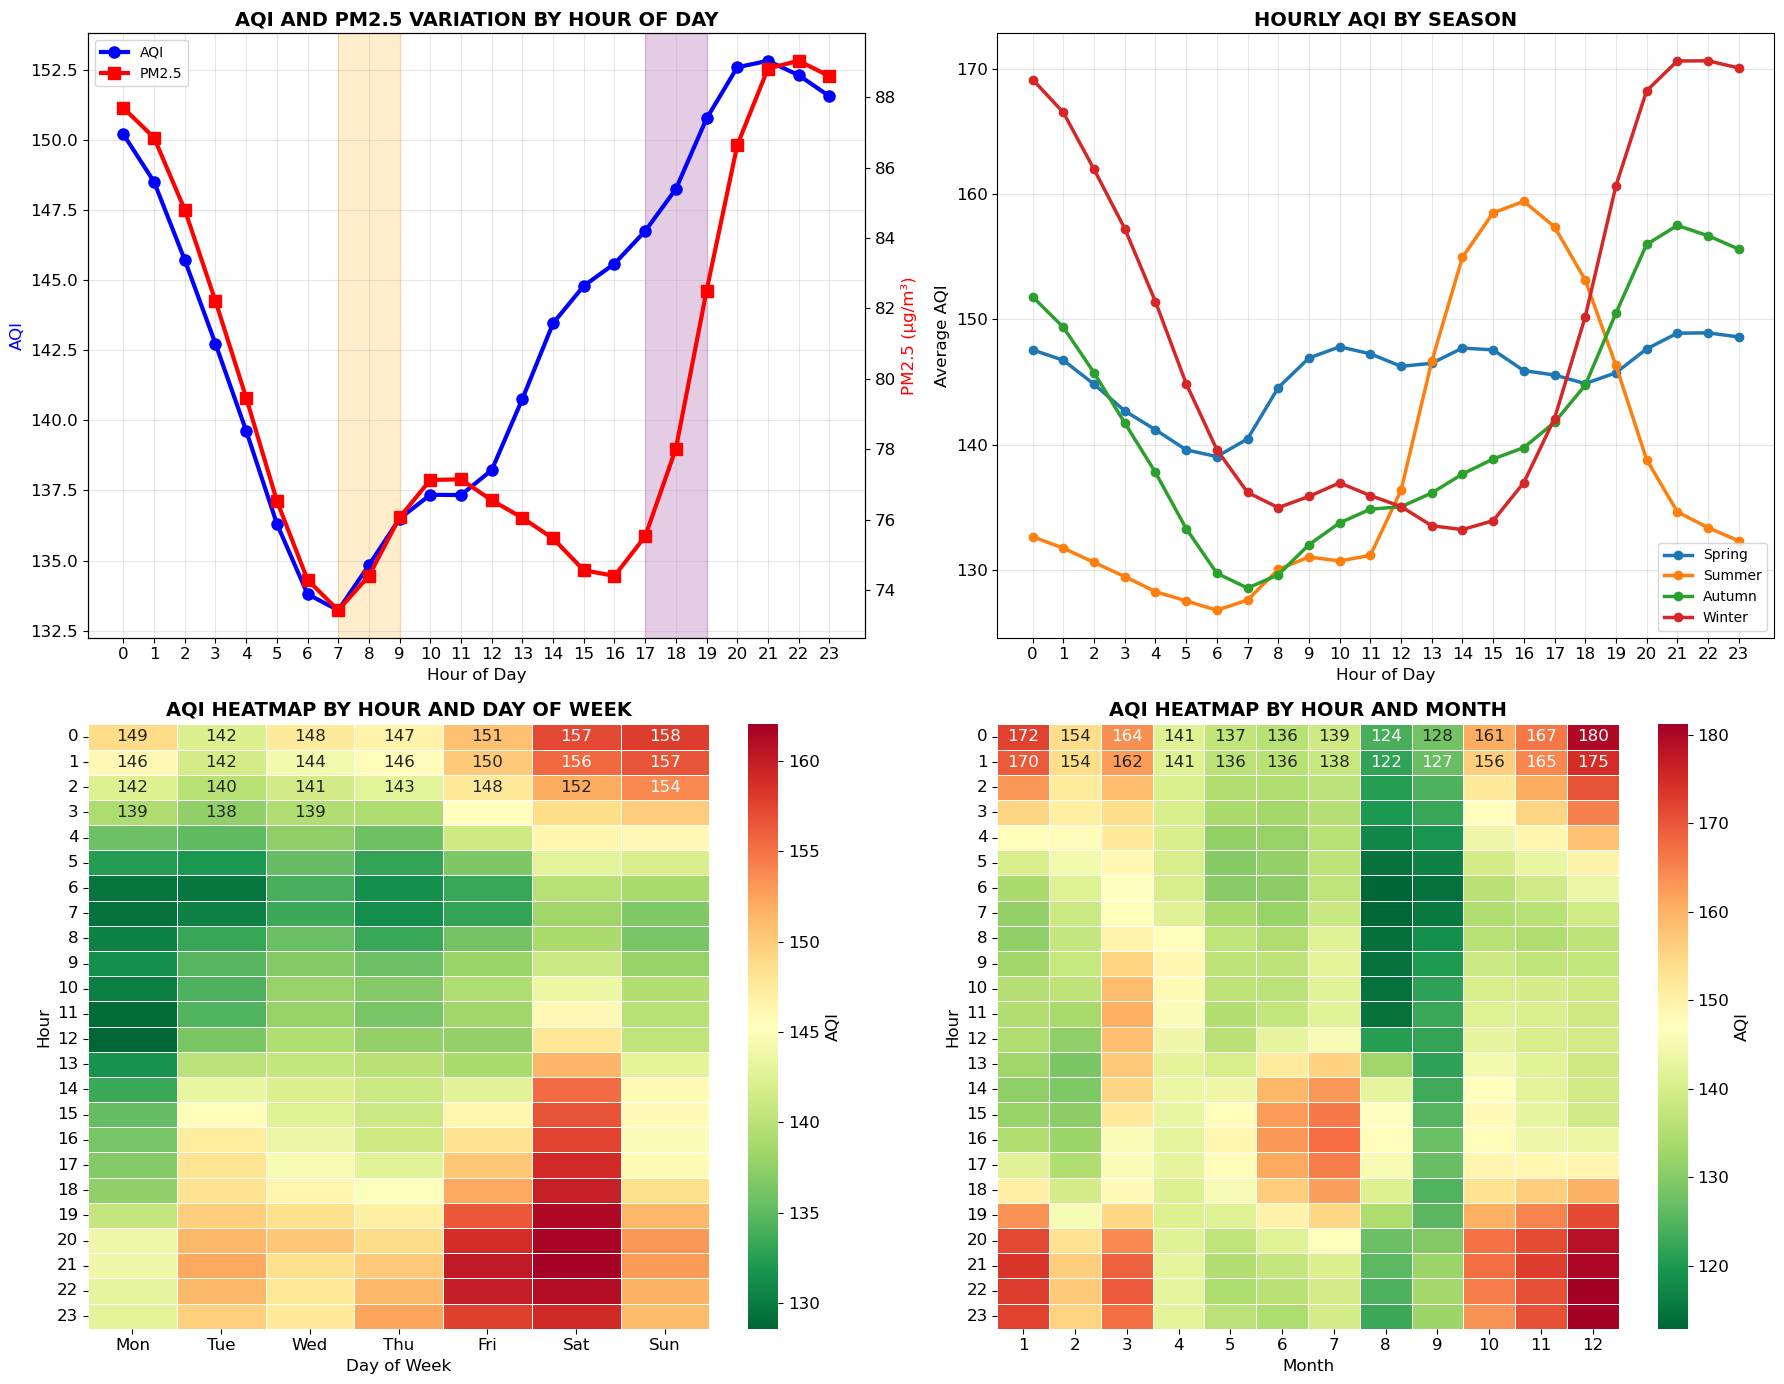

In [20]:
# =============================================================================
# 7. AQI ANALYSIS BY HOUR AND SEASON
# =============================================================================

fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# 1. Average AQI by Hour of Day
aqi_by_hour = df.groupby('hour')['AQI'].mean()
pm25_by_hour = df.groupby('hour')['PM2.5'].mean()

ax1 = axes[0, 0]
ax2 = ax1.twinx()

line1 = ax1.plot(aqi_by_hour.index, aqi_by_hour.values, 'b-', linewidth=3, marker='o', 
                  markersize=8, label='AQI')
line2 = ax2.plot(pm25_by_hour.index, pm25_by_hour.values, 'r-', linewidth=3, marker='s', 
                  markersize=8, label='PM2.5')

ax1.set_xlabel('Hour of Day')
ax1.set_ylabel('AQI', color='blue')
ax2.set_ylabel('PM2.5 (μg/m³)', color='red')
ax1.set_title('AQI AND PM2.5 VARIATION BY HOUR OF DAY', fontweight='bold', fontsize=14)
ax1.set_xticks(range(0, 24))
ax1.grid(alpha=0.3)

# Mark important time periods
ax1.axvspan(7, 9, alpha=0.2, color='orange', label='Morning Rush Hour')
ax1.axvspan(17, 19, alpha=0.2, color='purple', label='Evening Rush Hour')

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')

# 2. AQI by Hour - by Season
aqi_hour_season = df.pivot_table(values='AQI', index='hour', columns='season', aggfunc='mean')
aqi_hour_season = aqi_hour_season[season_order]

for season, color in zip(season_order, season_colors):
    axes[0, 1].plot(aqi_hour_season.index, aqi_hour_season[season], 
                    linewidth=2.5, marker='o', markersize=6, label=season)

axes[0, 1].set_xlabel('Hour of Day')
axes[0, 1].set_ylabel('Average AQI')
axes[0, 1].set_title('HOURLY AQI BY SEASON', fontweight='bold', fontsize=14)
axes[0, 1].set_xticks(range(0, 24))
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# 3. Heatmap AQI by Hour and Day of Week
weekday_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
aqi_hour_weekday = df.pivot_table(values='AQI', index='hour', columns='weekday', aggfunc='mean')
aqi_hour_weekday.columns = weekday_names

sns.heatmap(aqi_hour_weekday, cmap='RdYlGn_r', annot=True, fmt='.0f', 
            linewidths=0.5, ax=axes[1, 0], cbar_kws={'label': 'AQI'})
axes[1, 0].set_xlabel('Day of Week')
axes[1, 0].set_ylabel('Hour')
axes[1, 0].set_title('AQI HEATMAP BY HOUR AND DAY OF WEEK', fontweight='bold', fontsize=14)

# 4. Heatmap AQI by Month and Hour
aqi_hour_month = df.pivot_table(values='AQI', index='hour', columns='month', aggfunc='mean')

sns.heatmap(aqi_hour_month, cmap='RdYlGn_r', annot=True, fmt='.0f', 
            linewidths=0.5, ax=axes[1, 1], cbar_kws={'label': 'AQI'})
axes[1, 1].set_xlabel('Month')
axes[1, 1].set_ylabel('Hour')
axes[1, 1].set_title('AQI HEATMAP BY HOUR AND MONTH', fontweight='bold', fontsize=14)

plt.tight_layout()
plt.show()


In [21]:
# AQI Statistics by Season
print("AQI STATISTICS BY SEASON:")
print("="*80)

aqi_season_stats = df.groupby('season').agg({
    'AQI': ['mean', 'median', 'std', 'min', 'max', 'count'],
    'PM2.5': ['mean', 'median', 'std']
}).round(2)

print(aqi_season_stats.reindex(season_order))

# Calculate % of AQI levels by season
print("\nAQI LEVEL DISTRIBUTION BY SEASON (%):")
print("="*80)

aqi_cat_season = pd.crosstab(df['season'], df['AQI_Category'], normalize='index') * 100
aqi_cat_season = aqi_cat_season.reindex(season_order)
aqi_cat_season = aqi_cat_season[aqi_order].round(2)
print(aqi_cat_season)


AQI STATISTICS BY SEASON:
          AQI                                    PM2.5              
         mean median    std   min    max   count  mean median    std
season                                                              
Spring 145.55 154.00  74.74 12.00 500.00  105984 77.21  59.00  68.73
Summer 137.92 152.00  61.87 12.00 500.00  105984 64.52  51.00  52.56
Autumn 141.62 151.00  83.47 12.00 500.00  104832 82.21  55.00  81.52
Winter 149.01 152.00 104.72 12.00 500.00  103968 95.74  56.00 108.09

AQI LEVEL DISTRIBUTION BY SEASON (%):
AQI_Category  Good  Moderate  Unhealthy for Sensitive Groups  Unhealthy  \
season                                                                    
Spring       10.35     20.67                           15.00      37.84   
Summer        8.79     23.70                           15.93      37.44   
Autumn       15.10     21.86                           12.67      32.54   
Winter       19.86     21.65                            8.10      27.22   

A

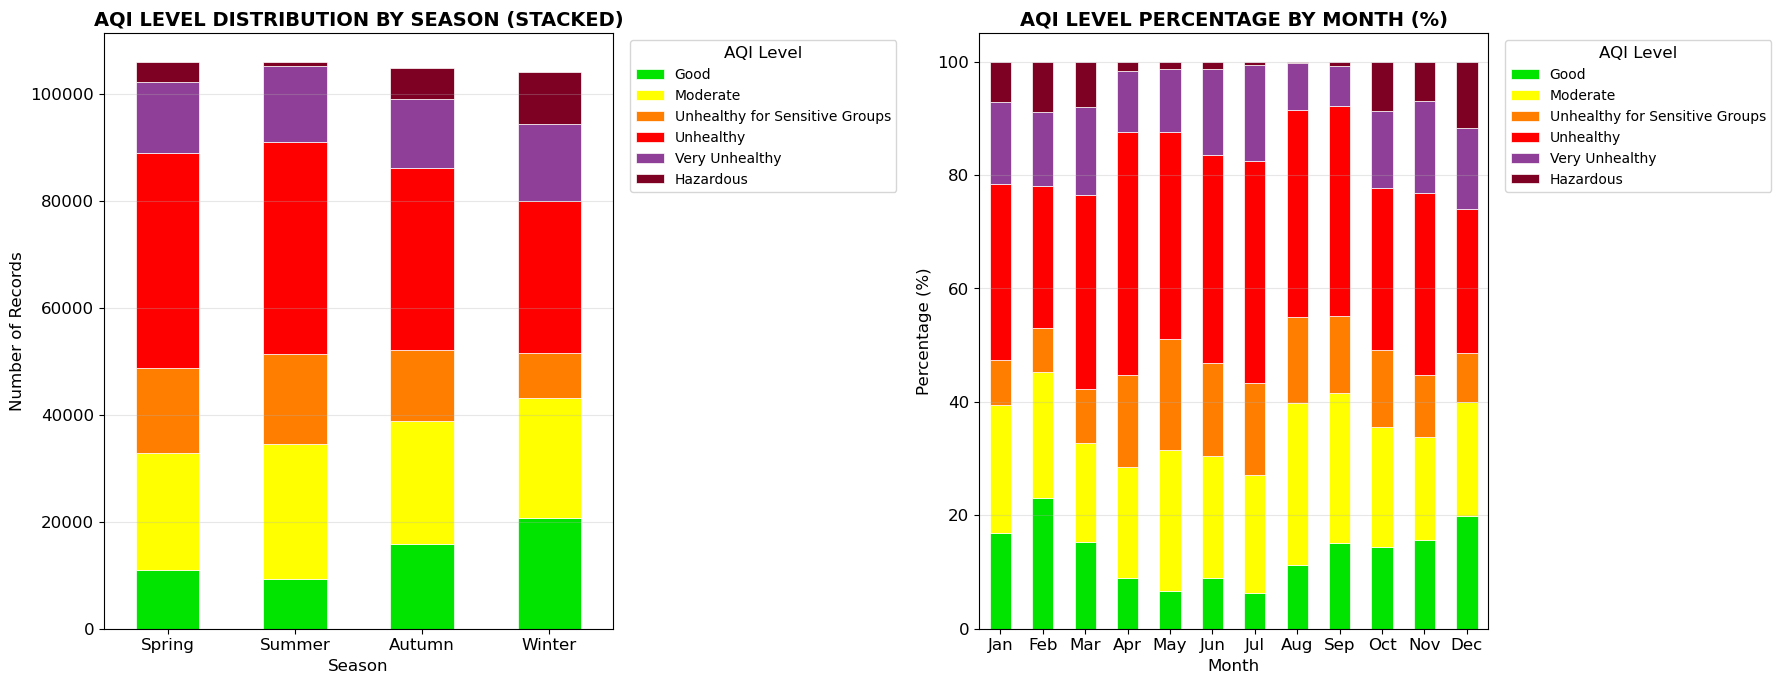

In [22]:
# Stacked bar chart - AQI Level Distribution by Season
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Stacked bar chart by Season
aqi_cat_season_abs = pd.crosstab(df['season'], df['AQI_Category'])
aqi_cat_season_abs = aqi_cat_season_abs.reindex(season_order)
if set(aqi_order).issubset(aqi_cat_season_abs.columns):
    aqi_cat_season_abs = aqi_cat_season_abs[aqi_order]

aqi_cat_season_abs.plot(kind='bar', stacked=True, ax=axes[0], 
                         color=[AQI_COLORS.get(c, '#808080') for c in aqi_cat_season_abs.columns],
                         edgecolor='white', linewidth=0.5)
axes[0].set_xlabel('Season')
axes[0].set_ylabel('Number of Records')
axes[0].set_title('AQI LEVEL DISTRIBUTION BY SEASON (STACKED)', fontweight='bold', fontsize=14)
axes[0].legend(title='AQI Level', bbox_to_anchor=(1.02, 1), loc='upper left')
axes[0].set_xticklabels(season_order, rotation=0)
axes[0].grid(axis='y', alpha=0.3)

# Stacked bar chart by Month  
aqi_cat_month = pd.crosstab(df['month'], df['AQI_Category'])
if set(aqi_order).issubset(aqi_cat_month.columns):
    aqi_cat_month = aqi_cat_month[aqi_order]

aqi_cat_month_pct = aqi_cat_month.div(aqi_cat_month.sum(axis=1), axis=0) * 100

aqi_cat_month_pct.plot(kind='bar', stacked=True, ax=axes[1],
                        color=[AQI_COLORS.get(c, '#808080') for c in aqi_cat_month_pct.columns],
                        edgecolor='white', linewidth=0.5)
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Percentage (%)')
axes[1].set_title('AQI LEVEL PERCENTAGE BY MONTH (%)', fontweight='bold', fontsize=14)
axes[1].legend(title='AQI Level', bbox_to_anchor=(1.02, 1), loc='upper left')
axes[1].set_xticklabels(month_names, rotation=0)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


## 8. WEATHER IMPACT ON PM2.5

### 8.1 Correlation Between Weather and PM2.5


In [23]:
# =============================================================================
# 8. WEATHER IMPACT ON PM2.5
# =============================================================================

# Calculate correlation coefficients
weather_pm25_cols = ['PM2.5', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
correlation = df[weather_pm25_cols].corr()

print("CORRELATION BETWEEN PM2.5 AND WEATHER FACTORS:")
print("="*60)
pm25_corr = correlation['PM2.5'].drop('PM2.5').sort_values(key=abs, ascending=False)
for var, corr in pm25_corr.items():
    direction = "Positive" if corr > 0 else "Negative"
    strength = "Strong" if abs(corr) > 0.3 else "Moderate" if abs(corr) > 0.1 else "Weak"
    print(f"  • {var:10} : {corr:>7.4f} ({direction}, {strength})")


CORRELATION BETWEEN PM2.5 AND WEATHER FACTORS:
  • WSPM       : -0.2714 (Negative, Moderate)
  • TEMP       : -0.1316 (Negative, Moderate)
  • DEWP       :  0.1130 (Positive, Moderate)
  • PRES       :  0.0199 (Positive, Weak)
  • RAIN       : -0.0145 (Negative, Weak)


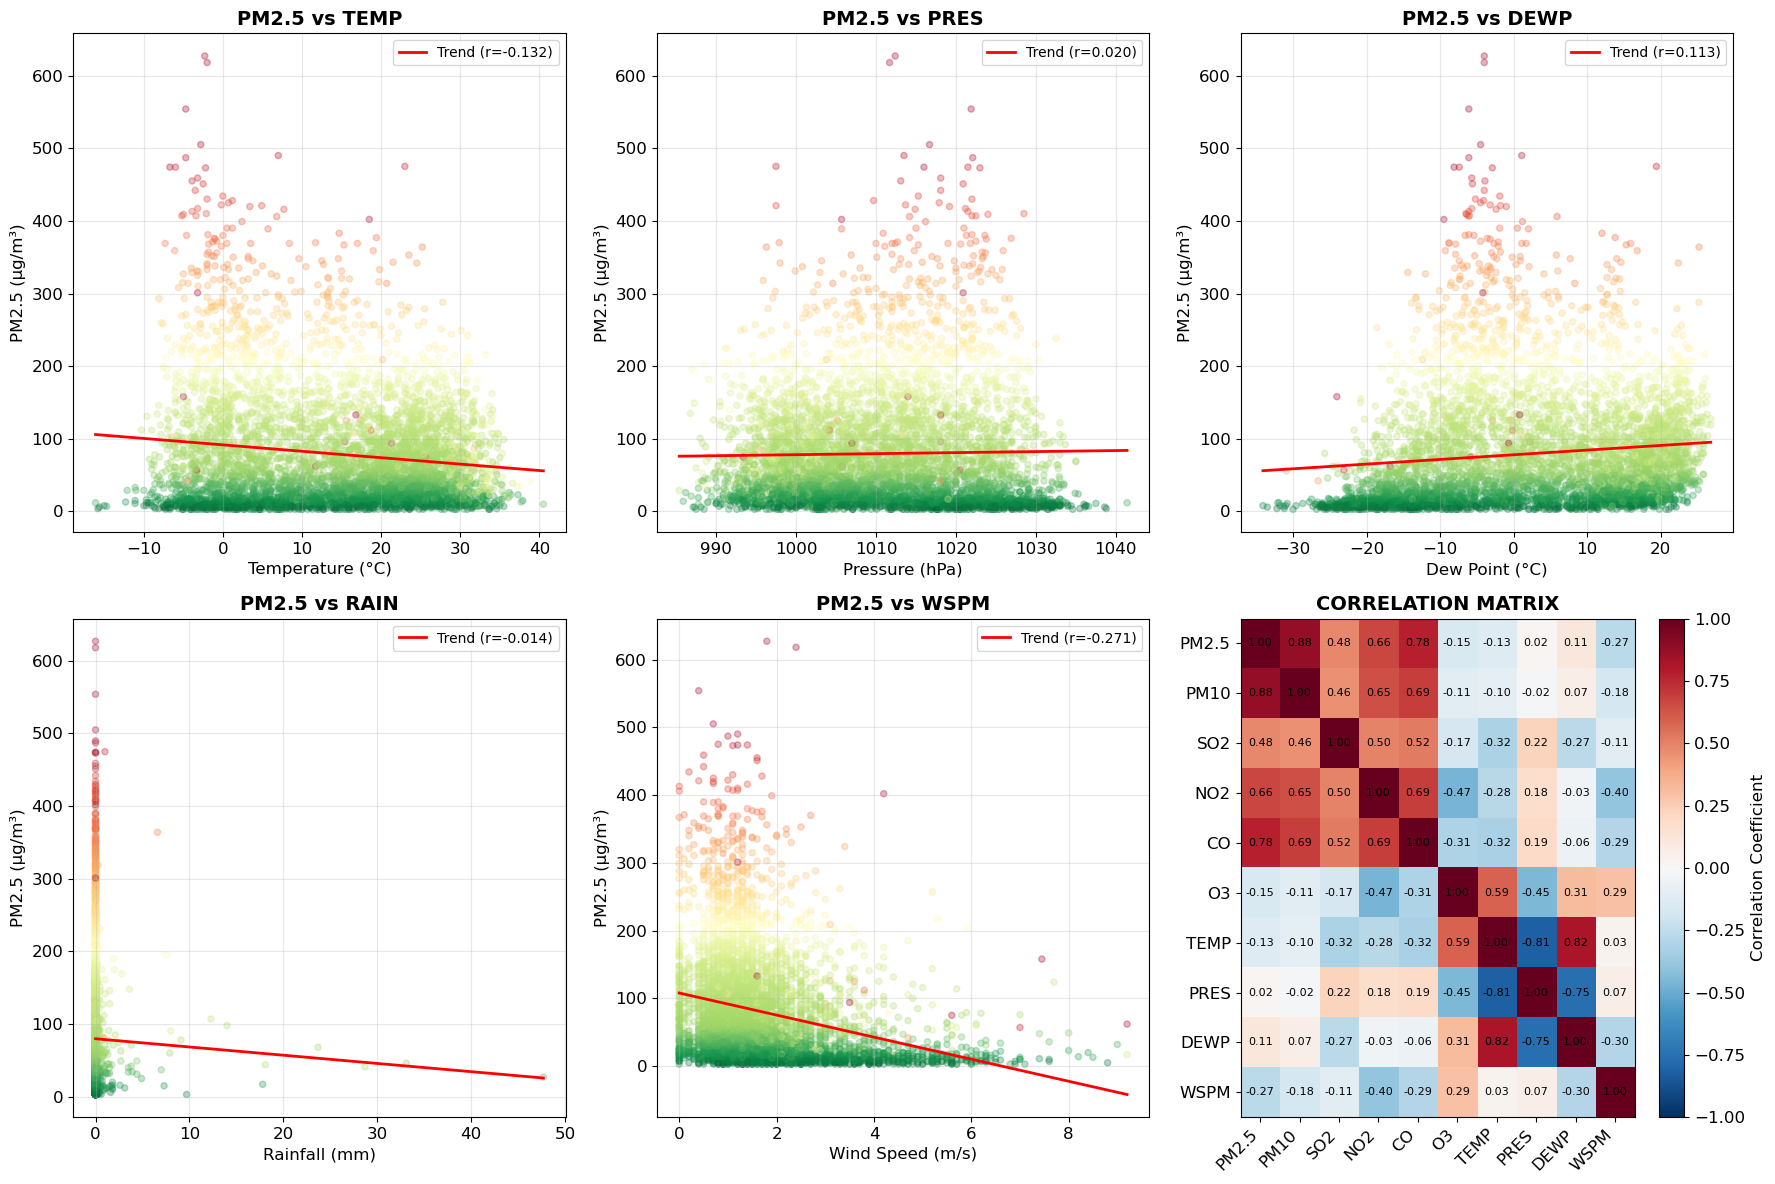

In [24]:
# Scatter plots - Weather Impact on PM2.5
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

weather_vars = ['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
weather_labels = ['Temperature (°C)', 'Pressure (hPa)', 'Dew Point (°C)', 'Rainfall (mm)', 'Wind Speed (m/s)']

# Sample data for better visualization
sample_df = df.sample(min(5000, len(df)), random_state=42)

for idx, (var, label) in enumerate(zip(weather_vars, weather_labels)):
    ax = axes[idx]
    
    # Scatter plot with low alpha to see density
    scatter = ax.scatter(sample_df[var], sample_df['PM2.5'], 
                         alpha=0.3, c=sample_df['AQI'], cmap='RdYlGn_r', s=20)
    
    # Trendline
    z = np.polyfit(sample_df[var].dropna(), sample_df.loc[sample_df[var].notna(), 'PM2.5'], 1)
    p = np.poly1d(z)
    x_line = np.linspace(sample_df[var].min(), sample_df[var].max(), 100)
    ax.plot(x_line, p(x_line), 'r-', linewidth=2, label=f'Trend (r={correlation.loc["PM2.5", var]:.3f})')
    
    ax.set_xlabel(label)
    ax.set_ylabel('PM2.5 (μg/m³)')
    ax.set_title(f'PM2.5 vs {var}', fontweight='bold')
    ax.legend(loc='upper right')
    ax.grid(alpha=0.3)

# Correlation heatmap
all_vars = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'WSPM']
full_corr = df[all_vars].corr()

im = axes[5].imshow(full_corr, cmap='RdBu_r', aspect='auto', vmin=-1, vmax=1)
axes[5].set_xticks(range(len(all_vars)))
axes[5].set_yticks(range(len(all_vars)))
axes[5].set_xticklabels(all_vars, rotation=45, ha='right')
axes[5].set_yticklabels(all_vars)
axes[5].set_title('CORRELATION MATRIX', fontweight='bold')

# Add correlation values
for i in range(len(all_vars)):
    for j in range(len(all_vars)):
        text = axes[5].text(j, i, f'{full_corr.iloc[i, j]:.2f}',
                           ha="center", va="center", color="black", fontsize=8)

plt.colorbar(im, ax=axes[5], label='Correlation Coefficient')

plt.tight_layout()
plt.show()


### 8.2 Wind Speed and Direction Impact on PM2.5


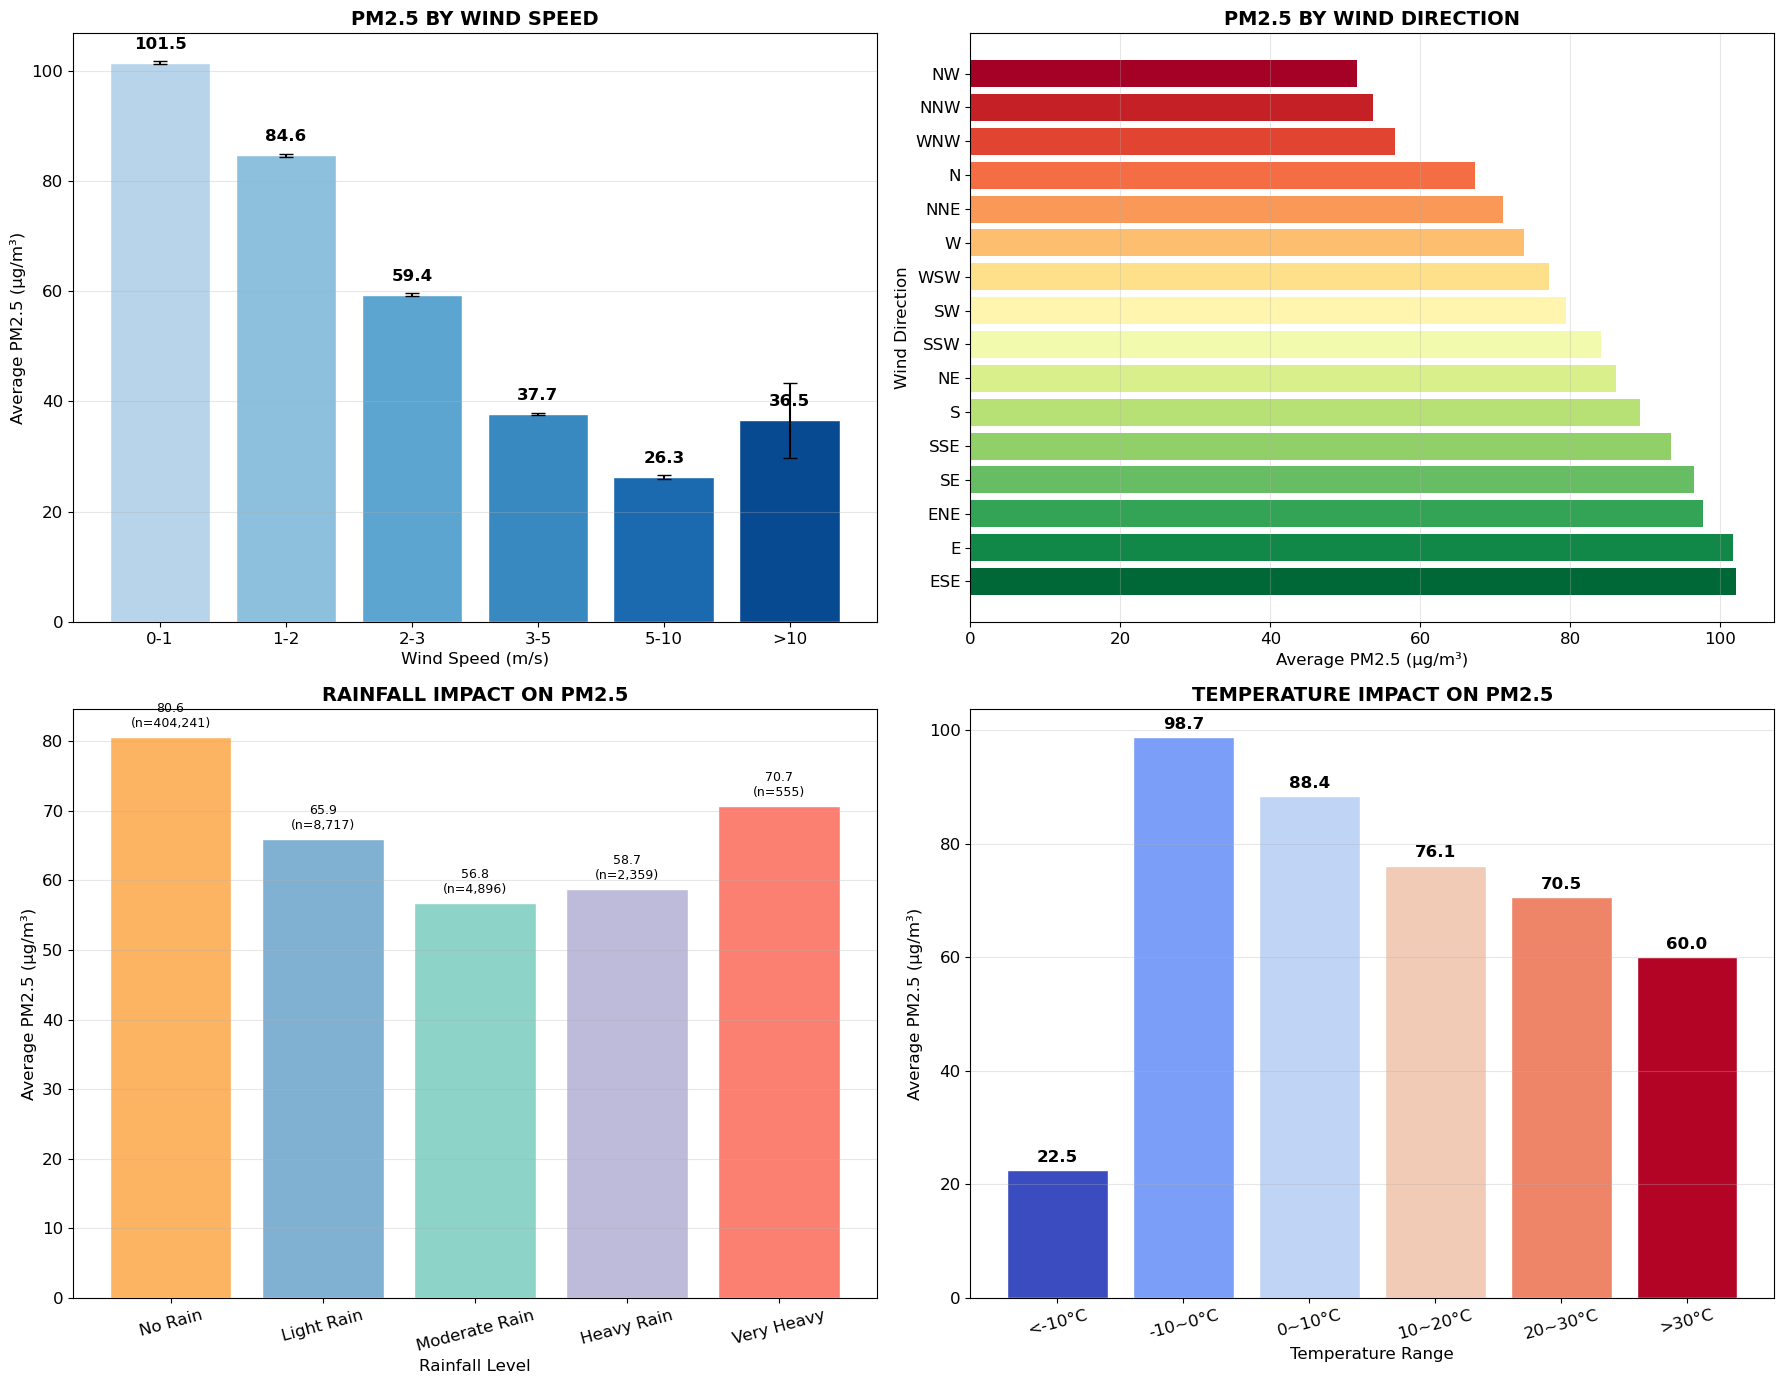

In [25]:
# Wind Speed Impact
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# 1. PM2.5 by Wind Speed Range
df['wind_speed_cat'] = pd.cut(df['WSPM'], bins=[0, 1, 2, 3, 5, 10, 20], 
                               labels=['0-1', '1-2', '2-3', '3-5', '5-10', '>10'])

wind_pm25 = df.groupby('wind_speed_cat')['PM2.5'].agg(['mean', 'median', 'std', 'count'])
bars = axes[0, 0].bar(range(len(wind_pm25)), wind_pm25['mean'], 
                       yerr=wind_pm25['std']/np.sqrt(wind_pm25['count']), 
                       capsize=5, color=plt.cm.Blues(np.linspace(0.3, 0.9, len(wind_pm25))),
                       edgecolor='white')
axes[0, 0].set_xticks(range(len(wind_pm25)))
axes[0, 0].set_xticklabels(wind_pm25.index)
axes[0, 0].set_xlabel('Wind Speed (m/s)')
axes[0, 0].set_ylabel('Average PM2.5 (μg/m³)')
axes[0, 0].set_title('PM2.5 BY WIND SPEED', fontweight='bold', fontsize=14)
axes[0, 0].grid(axis='y', alpha=0.3)
for bar, val in zip(bars, wind_pm25['mean']):
    axes[0, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2,
                    f'{val:.1f}', ha='center', va='bottom', fontweight='bold')

# 2. PM2.5 by Wind Direction
wind_dir_pm25 = df.groupby('wd')['PM2.5'].mean().sort_values(ascending=False)
colors_wind = plt.cm.RdYlGn_r(np.linspace(0, 1, len(wind_dir_pm25)))
axes[0, 1].barh(range(len(wind_dir_pm25)), wind_dir_pm25.values, color=colors_wind)
axes[0, 1].set_yticks(range(len(wind_dir_pm25)))
axes[0, 1].set_yticklabels(wind_dir_pm25.index)
axes[0, 1].set_xlabel('Average PM2.5 (μg/m³)')
axes[0, 1].set_ylabel('Wind Direction')
axes[0, 1].set_title('PM2.5 BY WIND DIRECTION', fontweight='bold', fontsize=14)
axes[0, 1].grid(axis='x', alpha=0.3)

# 3. Rainfall Impact
df['rain_cat'] = pd.cut(df['RAIN'], bins=[-0.01, 0, 0.5, 2, 10, 100], 
                         labels=['No Rain', 'Light Rain', 'Moderate Rain', 'Heavy Rain', 'Very Heavy'])
rain_pm25 = df.groupby('rain_cat')['PM2.5'].agg(['mean', 'count'])
rain_colors = ['#FDB462', '#80B1D3', '#8DD3C7', '#BEBADA', '#FB8072']
bars = axes[1, 0].bar(range(len(rain_pm25)), rain_pm25['mean'], color=rain_colors, edgecolor='white')
axes[1, 0].set_xticks(range(len(rain_pm25)))
axes[1, 0].set_xticklabels(rain_pm25.index, rotation=15)
axes[1, 0].set_xlabel('Rainfall Level')
axes[1, 0].set_ylabel('Average PM2.5 (μg/m³)')
axes[1, 0].set_title('RAINFALL IMPACT ON PM2.5', fontweight='bold', fontsize=14)
axes[1, 0].grid(axis='y', alpha=0.3)
for bar, val, count in zip(bars, rain_pm25['mean'], rain_pm25['count']):
    axes[1, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                    f'{val:.1f}\n(n={count:,})', ha='center', va='bottom', fontsize=9)

# 4. Temperature Impact
df['temp_cat'] = pd.cut(df['TEMP'], bins=[-30, -10, 0, 10, 20, 30, 50], 
                         labels=['<-10°C', '-10~0°C', '0~10°C', '10~20°C', '20~30°C', '>30°C'])
temp_pm25 = df.groupby('temp_cat')['PM2.5'].agg(['mean', 'count'])
temp_colors = plt.cm.coolwarm(np.linspace(0, 1, len(temp_pm25)))
bars = axes[1, 1].bar(range(len(temp_pm25)), temp_pm25['mean'], color=temp_colors, edgecolor='white')
axes[1, 1].set_xticks(range(len(temp_pm25)))
axes[1, 1].set_xticklabels(temp_pm25.index, rotation=15)
axes[1, 1].set_xlabel('Temperature Range')
axes[1, 1].set_ylabel('Average PM2.5 (μg/m³)')
axes[1, 1].set_title('TEMPERATURE IMPACT ON PM2.5', fontweight='bold', fontsize=14)
axes[1, 1].grid(axis='y', alpha=0.3)
for bar, val in zip(bars, temp_pm25['mean']):
    axes[1, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                    f'{val:.1f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


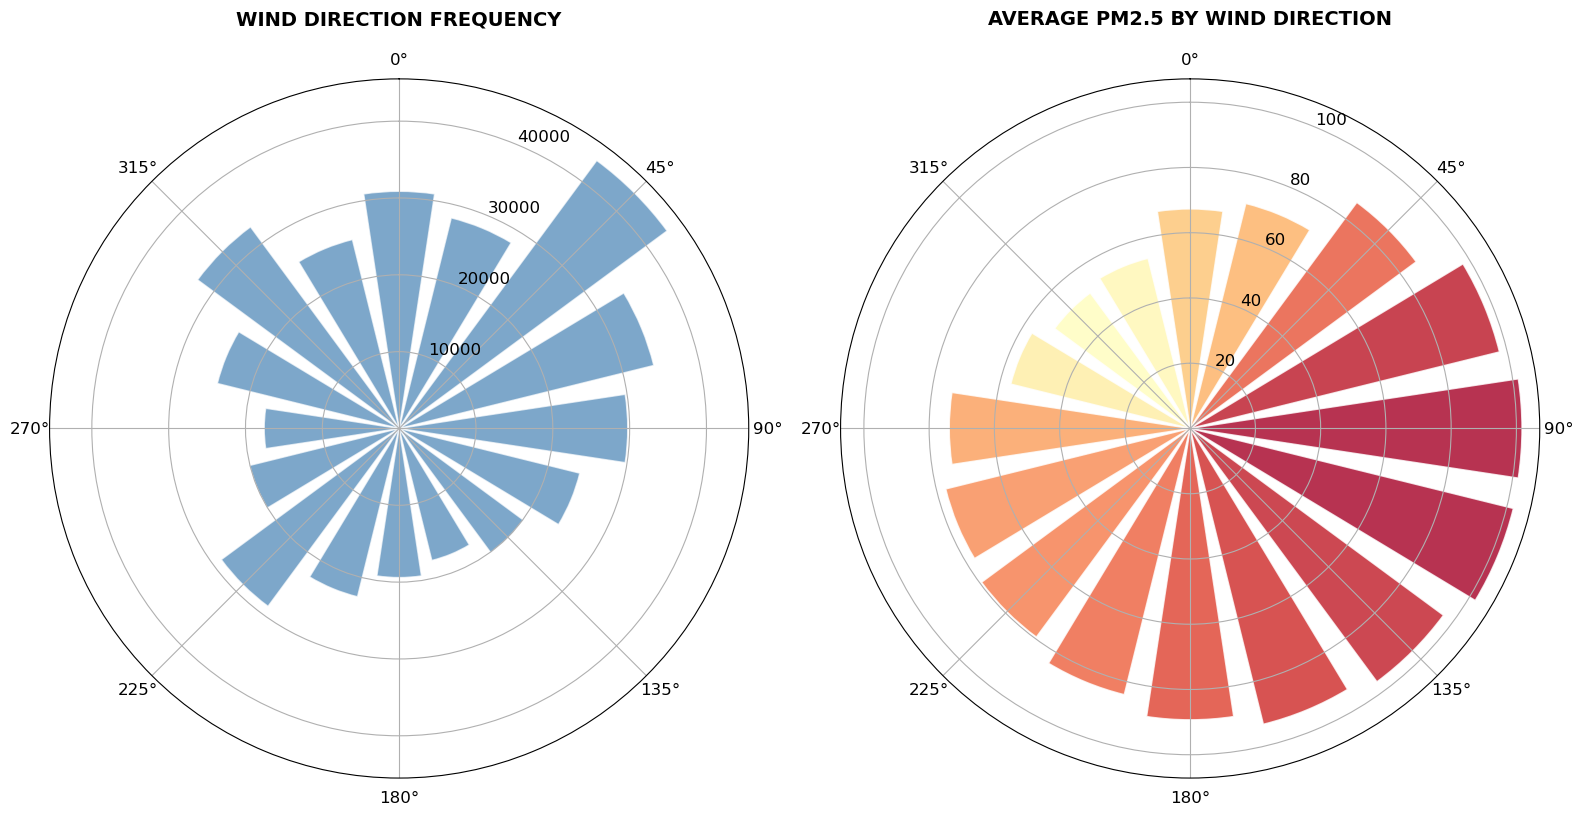

In [26]:
# Wind Rose - Wind Direction and PM2.5
fig, axes = plt.subplots(1, 2, figsize=(16, 8), subplot_kw=dict(projection='polar'))

# Convert wind direction to angle
wind_direction_map = {
    'N': 0, 'NNE': 22.5, 'NE': 45, 'ENE': 67.5,
    'E': 90, 'ESE': 112.5, 'SE': 135, 'SSE': 157.5,
    'S': 180, 'SSW': 202.5, 'SW': 225, 'WSW': 247.5,
    'W': 270, 'WNW': 292.5, 'NW': 315, 'NNW': 337.5
}

df['wind_angle'] = df['wd'].map(wind_direction_map)
df_wind = df.dropna(subset=['wind_angle'])

# 1. Wind Rose - Wind Direction Frequency
wind_counts = df_wind['wd'].value_counts()
angles = [np.radians(wind_direction_map[d]) for d in wind_counts.index]
values = wind_counts.values

bars = axes[0].bar(angles, values, width=0.3, alpha=0.7, color='steelblue', edgecolor='white')
axes[0].set_theta_zero_location('N')
axes[0].set_theta_direction(-1)
axes[0].set_title('WIND DIRECTION FREQUENCY', fontweight='bold', fontsize=14, pad=20)

# 2. Wind Rose - PM2.5 by Wind Direction
wind_pm25_mean = df_wind.groupby('wd')['PM2.5'].mean()
angles_pm25 = [np.radians(wind_direction_map[d]) for d in wind_pm25_mean.index]
values_pm25 = wind_pm25_mean.values

# Color based on PM2.5 level
colors_pm25 = plt.cm.RdYlGn_r(values_pm25 / max(values_pm25))
bars = axes[1].bar(angles_pm25, values_pm25, width=0.3, alpha=0.8, color=colors_pm25, edgecolor='white')
axes[1].set_theta_zero_location('N')
axes[1].set_theta_direction(-1)
axes[1].set_title('AVERAGE PM2.5 BY WIND DIRECTION', fontweight='bold', fontsize=14, pad=20)

plt.tight_layout()
plt.show()


## 9. COMPARISON BETWEEN MONITORING STATIONS


In [27]:
# =============================================================================
# 9. COMPARISON BETWEEN MONITORING STATIONS
# =============================================================================

# PM2.5 and AQI Statistics by Station
station_stats = df.groupby('station').agg({
    'PM2.5': ['mean', 'median', 'std', 'max'],
    'AQI': ['mean', 'median', 'std', 'max'],
    'No': 'count'
}).round(2)

station_stats.columns = ['PM2.5_mean', 'PM2.5_median', 'PM2.5_std', 'PM2.5_max',
                          'AQI_mean', 'AQI_median', 'AQI_std', 'AQI_max', 'count']
station_stats = station_stats.sort_values('PM2.5_mean', ascending=False)

print("PM2.5 AND AQI STATISTICS BY MONITORING STATION:")
print("="*100)
print(station_stats)


PM2.5 AND AQI STATISTICS BY MONITORING STATION:
               PM2.5_mean  PM2.5_median  PM2.5_std  PM2.5_max  AQI_mean  \
station                                                                   
Dongsi              86.14         61.00      86.26     737.00    149.49   
Nongzhanguan        85.08         59.00      86.69     844.00    149.01   
Wanshouxigong       85.07         60.00      86.00     999.00    149.24   
Gucheng             84.07         60.00      82.99     770.00    149.09   
Wanliu              83.47         59.00      82.13     957.00    147.05   
Guanyuan            82.90         59.00      81.07     680.00    147.26   
Aotizhongxin        82.54         58.00      81.96     898.00    146.84   
Tiantan             82.03         58.00      80.90     821.00    147.20   
Shunyi              79.44         55.00      81.50     941.00    141.66   
Changping           70.99         46.00      72.40     882.00    134.27   
Huairou             69.50         47.00      70.99  

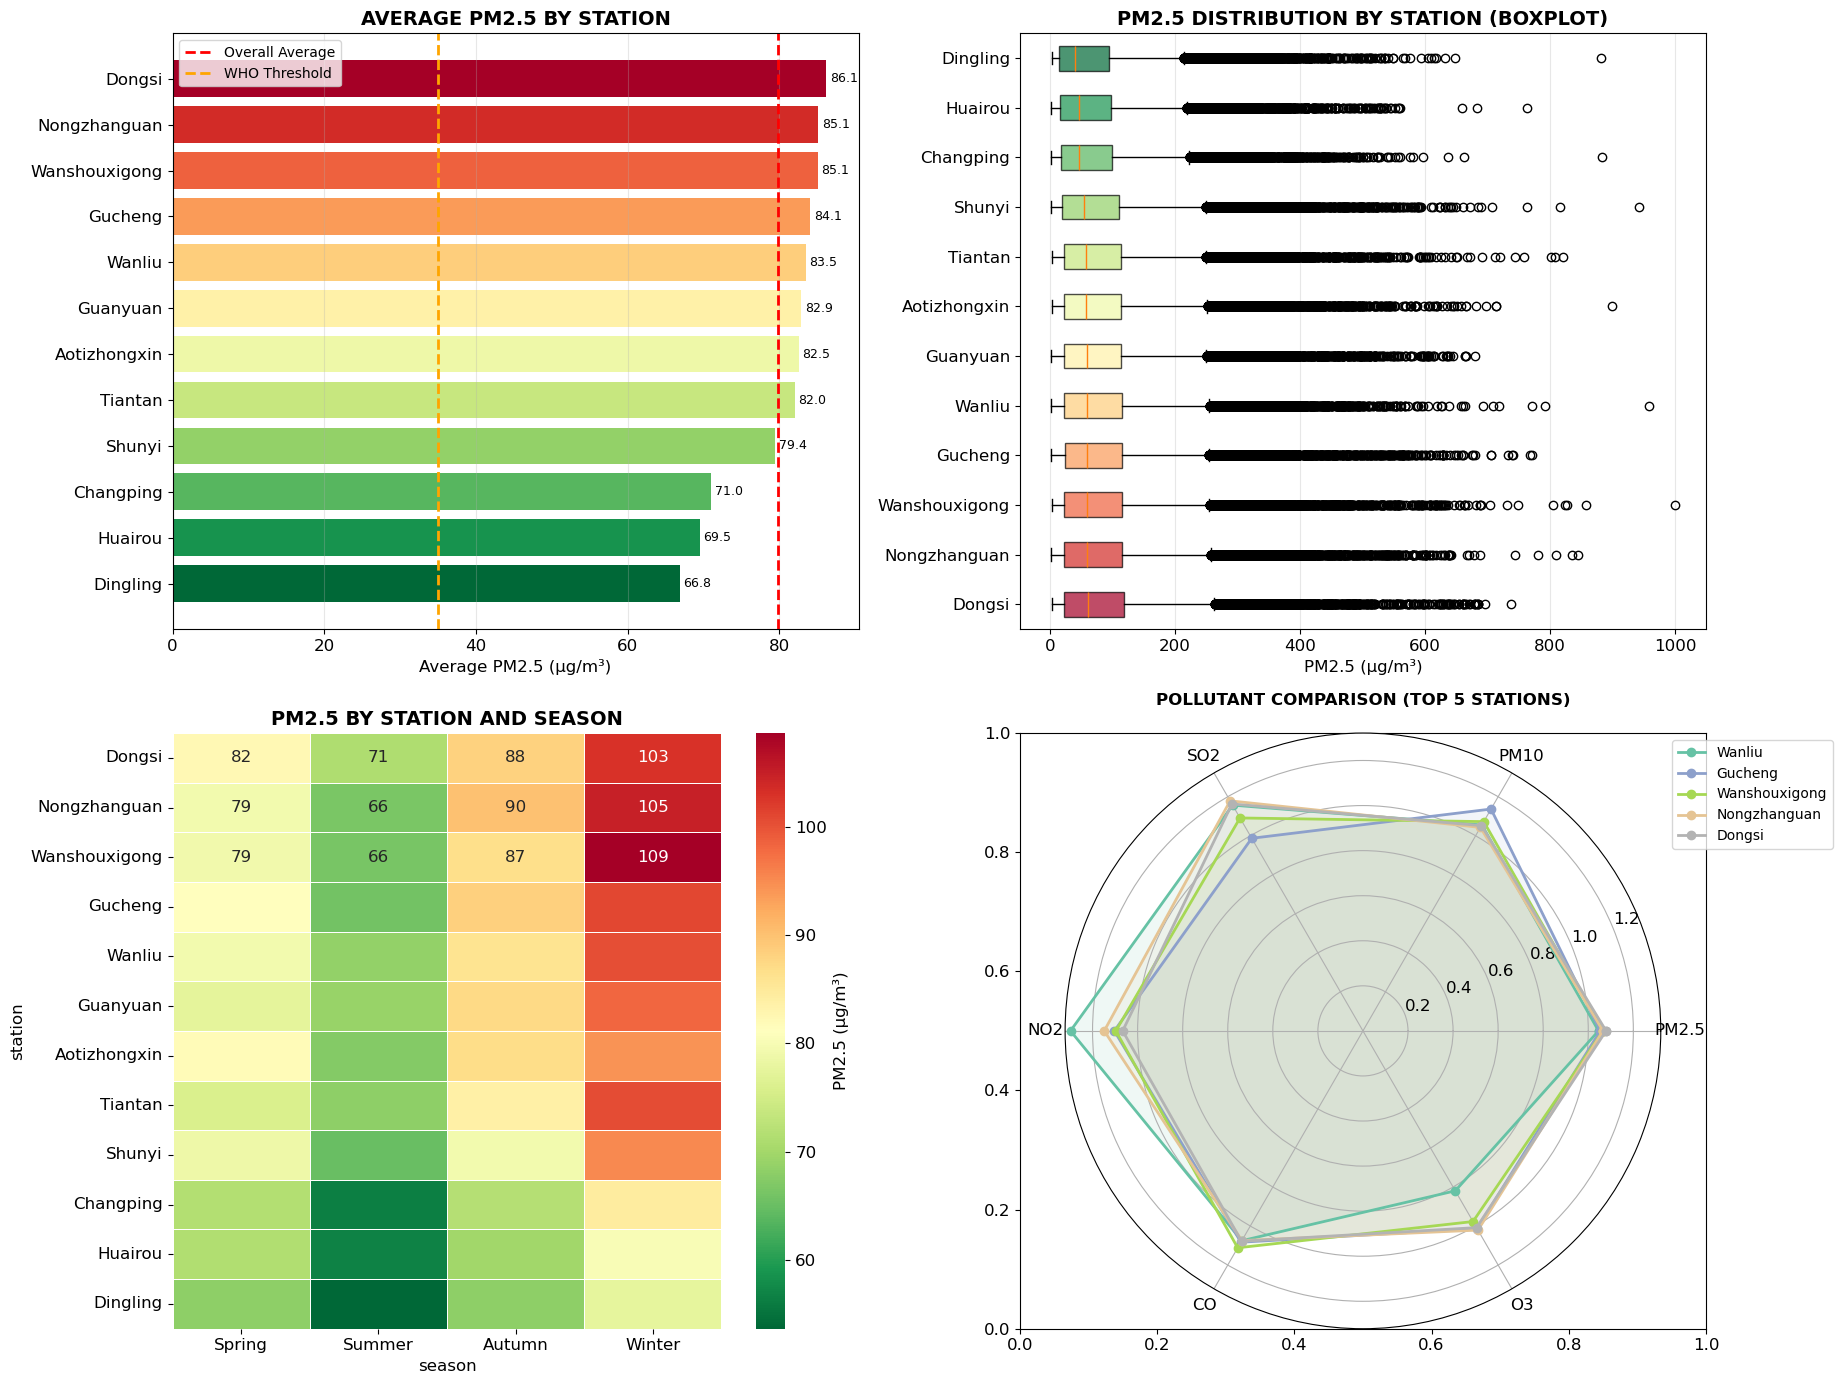

In [28]:
# Visualize station comparison
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# 1. Average PM2.5 by Station
pm25_by_station = df.groupby('station')['PM2.5'].mean().sort_values(ascending=True)
colors_station = plt.cm.RdYlGn_r(np.linspace(0, 1, len(pm25_by_station)))
bars = axes[0, 0].barh(range(len(pm25_by_station)), pm25_by_station.values, color=colors_station)
axes[0, 0].set_yticks(range(len(pm25_by_station)))
axes[0, 0].set_yticklabels(pm25_by_station.index)
axes[0, 0].set_xlabel('Average PM2.5 (μg/m³)')
axes[0, 0].set_title('AVERAGE PM2.5 BY STATION', fontweight='bold', fontsize=14)
axes[0, 0].axvline(x=df['PM2.5'].mean(), color='red', linestyle='--', linewidth=2, label='Overall Average')
axes[0, 0].axvline(x=35, color='orange', linestyle='--', linewidth=2, label='WHO Threshold')
axes[0, 0].legend()
axes[0, 0].grid(axis='x', alpha=0.3)
for bar, val in zip(bars, pm25_by_station.values):
    axes[0, 0].text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
                    f'{val:.1f}', ha='left', va='center', fontsize=9)

# 2. PM2.5 Boxplot by Station
station_order_by_mean = pm25_by_station.index.tolist()[::-1]
station_data = [df[df['station'] == s]['PM2.5'].dropna() for s in station_order_by_mean]
bp = axes[0, 1].boxplot(station_data, labels=station_order_by_mean, vert=False, patch_artist=True)
for patch, color in zip(bp['boxes'], colors_station[::-1]):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
axes[0, 1].set_xlabel('PM2.5 (μg/m³)')
axes[0, 1].set_title('PM2.5 DISTRIBUTION BY STATION (BOXPLOT)', fontweight='bold', fontsize=14)
axes[0, 1].grid(axis='x', alpha=0.3)

# 3. Heatmap PM2.5 by Station and Season
pm25_station_season = df.pivot_table(values='PM2.5', index='station', 
                                       columns='season', aggfunc='mean')
pm25_station_season = pm25_station_season[season_order]
pm25_station_season = pm25_station_season.reindex(station_order_by_mean)

sns.heatmap(pm25_station_season, cmap='RdYlGn_r', annot=True, fmt='.0f',
            linewidths=0.5, ax=axes[1, 0], cbar_kws={'label': 'PM2.5 (μg/m³)'})
axes[1, 0].set_title('PM2.5 BY STATION AND SEASON', fontweight='bold', fontsize=14)

# 4. Radar chart - Compare pollutant indicators (top 5 stations)
top_stations = pm25_by_station.tail(5).index.tolist()

# Normalize data
normalized_data = {}
for station in top_stations:
    station_data = df[df['station'] == station][pollutant_cols].mean()
    normalized_data[station] = (station_data / df[pollutant_cols].mean()).values

# Radar chart
angles = np.linspace(0, 2 * np.pi, len(pollutant_cols), endpoint=False).tolist()
angles += angles[:1]

ax = plt.subplot(2, 2, 4, projection='polar')
colors_radar = plt.cm.Set2(np.linspace(0, 1, len(top_stations)))

for idx, (station, color) in enumerate(zip(top_stations, colors_radar)):
    values = normalized_data[station].tolist()
    values += values[:1]
    ax.plot(angles, values, 'o-', linewidth=2, label=station, color=color)
    ax.fill(angles, values, alpha=0.1, color=color)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(pollutant_cols)
ax.set_title('POLLUTANT COMPARISON (TOP 5 STATIONS)', fontweight='bold', fontsize=12, pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))

plt.tight_layout()
plt.show()


## 10. TREND ANALYSIS AND SPECIAL PATTERNS

### 10.1 Severe Pollution Events


In [29]:
# =============================================================================
# 10. TREND ANALYSIS AND SPECIAL PATTERNS
# =============================================================================

# Severe pollution days (AQI > 300)
severe_pollution = df[df['AQI'] > 300]

print("SEVERE POLLUTION EVENTS ANALYSIS (AQI > 300):")
print("="*70)
print(f"  • Total records with AQI > 300: {len(severe_pollution):,}")
print(f"  • Percentage: {len(severe_pollution)/len(df)*100:.2f}%")

# By Year
severe_by_year = severe_pollution.groupby('year').size()
print(f"\nSevere pollution events by year:")
for year, count in severe_by_year.items():
    print(f"  • {year}: {count:,} records")

# By Season
severe_by_season = severe_pollution.groupby('season').size().reindex(season_order)
print(f"\nSevere pollution events by season:")
for season, count in severe_by_season.items():
    print(f"  • {season}: {count:,} records")

# Top 10 most polluted days
daily_max_aqi = df.groupby('date')['AQI'].max().sort_values(ascending=False).head(10)
print(f"\nTOP 10 MOST POLLUTED DAYS:")
for i, (date, aqi) in enumerate(daily_max_aqi.items(), 1):
    print(f"  {i:2}. {date} - AQI: {aqi:.0f}")


SEVERE POLLUTION EVENTS ANALYSIS (AQI > 300):
  • Total records with AQI > 300: 20,016
  • Percentage: 4.76%

Severe pollution events by year:
  • 2013: 3,267 records
  • 2014: 5,787 records
  • 2015: 5,494 records
  • 2016: 3,867 records
  • 2017: 1,601 records

Severe pollution events by season:
  • Spring: 3,885 records
  • Summer: 736 records
  • Autumn: 5,778 records
  • Winter: 9,617 records

TOP 10 MOST POLLUTED DAYS:
   1. 2014-11-27 - AQI: 500
   2. 2014-11-30 - AQI: 500
   3. 2013-07-21 - AQI: 500
   4. 2015-12-30 - AQI: 500
   5. 2017-01-03 - AQI: 500
   6. 2017-01-04 - AQI: 500
   7. 2016-01-02 - AQI: 500
   8. 2016-01-03 - AQI: 500
   9. 2014-12-01 - AQI: 500
  10. 2013-08-15 - AQI: 500


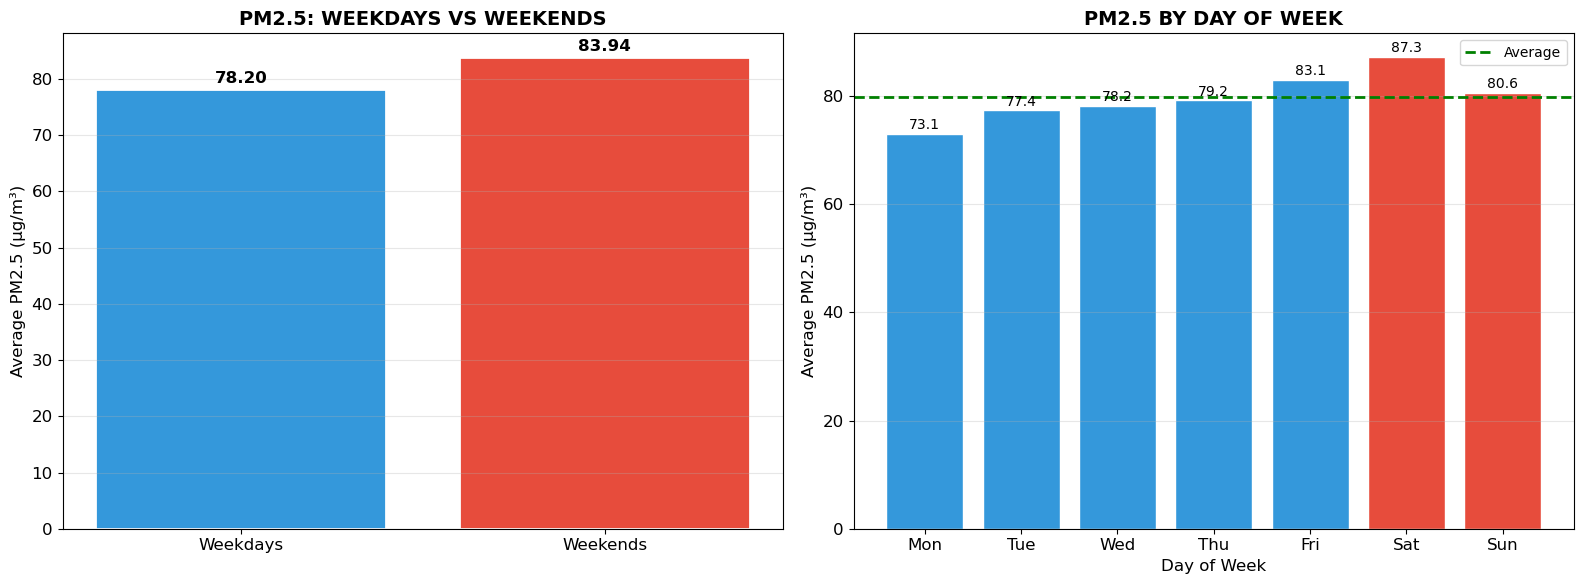


PM2.5 Comparison:
  • Weekdays: 78.20 μg/m³
  • Weekends: 83.94 μg/m³
  • Difference: 5.74 μg/m³ (7.34%)


In [30]:
# Compare PM2.5 Weekdays vs Weekends
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. PM2.5 Weekdays vs Weekends
weekday_weekend = df.groupby('is_weekend')['PM2.5'].mean()
labels = ['Weekdays', 'Weekends']
colors_ww = ['#3498DB', '#E74C3C']
bars = axes[0].bar(labels, weekday_weekend.values, color=colors_ww, edgecolor='white', linewidth=2)
axes[0].set_ylabel('Average PM2.5 (μg/m³)')
axes[0].set_title('PM2.5: WEEKDAYS VS WEEKENDS', fontweight='bold', fontsize=14)
for bar, val in zip(bars, weekday_weekend.values):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                 f'{val:.2f}', ha='center', va='bottom', fontweight='bold', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)

# 2. PM2.5 by Day of Week
weekday_pm25 = df.groupby('weekday')['PM2.5'].mean()
weekday_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
colors_weekday = ['#3498DB']*5 + ['#E74C3C']*2
bars = axes[1].bar(weekday_labels, weekday_pm25.values, color=colors_weekday, edgecolor='white')
axes[1].set_xlabel('Day of Week')
axes[1].set_ylabel('Average PM2.5 (μg/m³)')
axes[1].set_title('PM2.5 BY DAY OF WEEK', fontweight='bold', fontsize=14)
axes[1].axhline(y=df['PM2.5'].mean(), color='green', linestyle='--', linewidth=2, label='Average')
for bar, val in zip(bars, weekday_pm25.values):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.3,
                 f'{val:.1f}', ha='center', va='bottom', fontsize=10)
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Statistics
print(f"\nPM2.5 Comparison:")
print(f"  • Weekdays: {weekday_weekend[0]:.2f} μg/m³")
print(f"  • Weekends: {weekday_weekend[1]:.2f} μg/m³")
print(f"  • Difference: {abs(weekday_weekend[0] - weekday_weekend[1]):.2f} μg/m³ ({abs(weekday_weekend[0] - weekday_weekend[1])/weekday_weekend[0]*100:.2f}%)")


## 11. SUMMARY AND CONCLUSION


In [31]:
# =============================================================================
# 11. SUMMARY AND CONCLUSION
# =============================================================================

print("="*85)
print("BEIJING AIR QUALITY DATA ANALYSIS SUMMARY (2013-2017)")
print("="*85)

print(f"""
GENERAL INFORMATION:
{'─'*70}
  • Total records: {len(df):,}
  • Number of monitoring stations: {df['station'].nunique()}
  • Time period: {df['datetime'].min().strftime('%d/%m/%Y')} - {df['datetime'].max().strftime('%d/%m/%Y')}
  • Number of days: {df['date'].nunique():,} days

PM2.5 STATISTICS:
{'─'*70}
  • Average PM2.5: {df['PM2.5'].mean():.2f} μg/m³
  • Median PM2.5: {df['PM2.5'].median():.2f} μg/m³
  • Maximum PM2.5: {df['PM2.5'].max():.2f} μg/m³
  • Minimum PM2.5: {df['PM2.5'].min():.2f} μg/m³
  • Standard deviation: {df['PM2.5'].std():.2f} μg/m³

COMPOSITE AQI ANALYSIS (FROM 6 POLLUTANTS):
{'─'*70}
  • Method: AQI = MAX(AQI_PM25, AQI_PM10, AQI_O3, AQI_NO2, AQI_SO2, AQI_CO)
  • Average AQI: {df['AQI'].mean():.1f}
  • "Good" percentage (AQI ≤ 50): {(df['AQI'] <= 50).sum() / len(df) * 100:.1f}%
  • "Unhealthy" percentage (AQI > 150): {(df['AQI'] > 150).sum() / len(df) * 100:.1f}%
  • "Hazardous" percentage (AQI > 300): {(df['AQI'] > 300).sum() / len(df) * 100:.1f}%

DOMINANT POLLUTANT:
{'─'*70}""")

dom_dist_sorted = df['Dominant_Pollutant'].value_counts()
for pol in dom_dist_sorted.index:
    pct = dom_dist_sorted[pol] / len(df) * 100
    name = pollutant_names.get(pol, pol)
    print(f"  • {name:30s}: {pct:.1f}%")

print(f"""
AVERAGE AQI BY POLLUTANT:
{'─'*70}""")

for col in aqi_columns:
    pollutant = col.replace('AQI_', '')
    mean_aqi = df[col].mean()
    print(f"  • {pollutant:5s}: AQI = {mean_aqi:.1f}")

print(f"""
WEATHER IMPACT ON AQI:
{'─'*70}
  • Correlation with Wind Speed: {corr_matrix.loc['AQI', 'WSPM']:.3f} (Strong wind → lower pollution)
  • Correlation with Temperature: {corr_matrix.loc['AQI', 'TEMP']:.3f}
  • Correlation with Rainfall: {corr_matrix.loc['AQI', 'RAIN']:.3f} (Rain → lower pollution)

SEASONAL VARIATION:
{'─'*70}""")

for season in season_order:
    mean_aqi = df[df['season'] == season]['AQI'].mean()
    dom_season = df[df['season'] == season]['Dominant_Pollutant'].mode().values[0]
    print(f"  • {season}: AQI = {mean_aqi:.1f}, Dominant = {dom_season}")

print(f"""
DAILY VARIATION:
{'─'*70}
  • Highest AQI hour: {df.groupby('hour')['AQI'].mean().idxmax()}:00 ({df.groupby('hour')['AQI'].mean().max():.1f})
  • Lowest AQI hour: {df.groupby('hour')['AQI'].mean().idxmin()}:00 ({df.groupby('hour')['AQI'].mean().min():.1f})

STATION COMPARISON:
{'─'*70}
  • Highest AQI station: {df.groupby('station')['AQI'].mean().idxmax()} ({df.groupby('station')['AQI'].mean().max():.1f})
  • Lowest AQI station: {df.groupby('station')['AQI'].mean().idxmin()} ({df.groupby('station')['AQI'].mean().min():.1f})
""")

print("="*85)
print("EDA ANALYSIS COMPLETE - READY FOR FORECASTING MODEL")
print("="*85)


BEIJING AIR QUALITY DATA ANALYSIS SUMMARY (2013-2017)

GENERAL INFORMATION:
──────────────────────────────────────────────────────────────────────
  • Total records: 420,768
  • Number of monitoring stations: 12
  • Time period: 01/03/2013 - 28/02/2017
  • Number of days: 1,461 days

PM2.5 STATISTICS:
──────────────────────────────────────────────────────────────────────
  • Average PM2.5: 79.84 μg/m³
  • Median PM2.5: 55.00 μg/m³
  • Maximum PM2.5: 999.00 μg/m³
  • Minimum PM2.5: 2.00 μg/m³
  • Standard deviation: 80.95 μg/m³

COMPOSITE AQI ANALYSIS (FROM 6 POLLUTANTS):
──────────────────────────────────────────────────────────────────────
  • Method: AQI = MAX(AQI_PM25, AQI_PM10, AQI_O3, AQI_NO2, AQI_SO2, AQI_CO)
  • Average AQI: 143.5
  • "Good" percentage (AQI ≤ 50): 13.5%
  • "Unhealthy" percentage (AQI > 150): 51.6%
  • "Hazardous" percentage (AQI > 300): 4.8%

DOMINANT POLLUTANT:
──────────────────────────────────────────────────────────────────────
  • PM2.5 (Fine Particles 2.5